In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")
import shap

In [ ]:
match_df= pd.read_csv("/content/matches.csv")
match_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
delivery_df= pd.read_csv("/content/deliveries.csv")
delivery_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [ ]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [ ]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [ ]:
delivery_df.shape

(260920, 17)

In [ ]:
match_df.shape

(1095, 20)

In [ ]:
delivery_df.duplicated().sum()

np.int64(0)

In [ ]:
match_df.duplicated().sum()

np.int64(0)

In [ ]:
delivery_df.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


In [ ]:
match_df.isnull().sum()

,0
id,0
season,0
city,51
date,0
match_type,0
player_of_match,5
venue,0
team1,0
team2,0
toss_winner,0


In [ ]:
#checking Unique value from venue
match_df[match_df['city'].isna()]['venue'].unique()

array(['Sharjah Cricket Stadium', 'Dubai International Cricket Stadium'],
      dtype=object)

In [ ]:
#Filling missing city values based on venue
match_df.loc[(match_df['city'].isna()) & (match_df['venue'] == 'Sharjah Cricket Stadium'), 'city'] = 'Sharjah'
match_df.loc[(match_df['city'].isna()) & (match_df['venue'] == 'Dubai International Cricket Stadium'), 'city'] = 'Dubai'
match_df['city'].isnull().sum()

np.int64(0)

In [ ]:
#checking Unique value from season
match_df['season'].unique()

array(['2007/08', '2009', '2009/10', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020/21', '2021', '2022',
       '2023', '2024'], dtype=object)

In [ ]:
#replacing the value with orignal season
match_df.replace({"season":{"2007/08":"2008","2009/10":"2010","2020/21":"2020"}},inplace=True)

In [ ]:
match_df.season.unique()

array(['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       '2024'], dtype=object)

In [ ]:
#Replacing Team old name to new name
team_map ={"Mumbai Indians":"Mumbai Indians",
          "Chennai Super Kings":"Chennai Super Kings",
          "Kolkata Knight Riders":"Kolkata Knight Riders",
          "Royal Challengers Bangalore":"Royal Challengers Bangalore",
          "Royal Challengers Bengaluru":"Royal Challengers Bangalore",
          "Rajasthan Royals":"Rajasthan Royals",
          "Kings XI Punjab":"Kings XI Punjab",
          "Punjab Kings":"Kings XI Punjab",
          "Sunrisers Hyderabad":"Sunrisers Hyderabad",
          "Deccan Chargers":"Sunrisers Hyderabad",
          "Delhi Capitals":"Delhi Capitals",
          "Delhi Daredevils":"Delhi Capitals",
          "Gujarat Titans":"Gujarat Titans",
          "Gujarat Lions":"Gujarat Titans",
          "Lucknow Super Giants":"Lucknow Super Giants",
          "Pune Warriors":"Pune Warriors",
          "Rising Pune Supergiant":"Pune Warriors",
          "Rising Pune Supergiants":"Pune Warriors",
          "Kochi Tuskers Kerala":"Kochi Tuskers Kerala"}

#For Match table
match_df['team1']= match_df['team1'].map(team_map)
match_df['team2']= match_df['team2'].map(team_map)
match_df['winner']= match_df['winner'].map(team_map)
match_df['toss_winner']= match_df['toss_winner'].map(team_map)

#For Deliverise Tables
delivery_df['batting_team']= delivery_df['batting_team'].map(team_map)
delivery_df['bowling_team']= delivery_df['bowling_team'].map(team_map)

In [ ]:
#Total matches per season
match_df['season'].value_counts().to_frame().T

season,2013,2022,2012,2023,2011,2024,2019,2016,2010,2021,2020,2014,2018,2017,2015,2008,2009
count,76,74,74,74,73,71,60,60,60,60,60,60,60,59,59,58,57


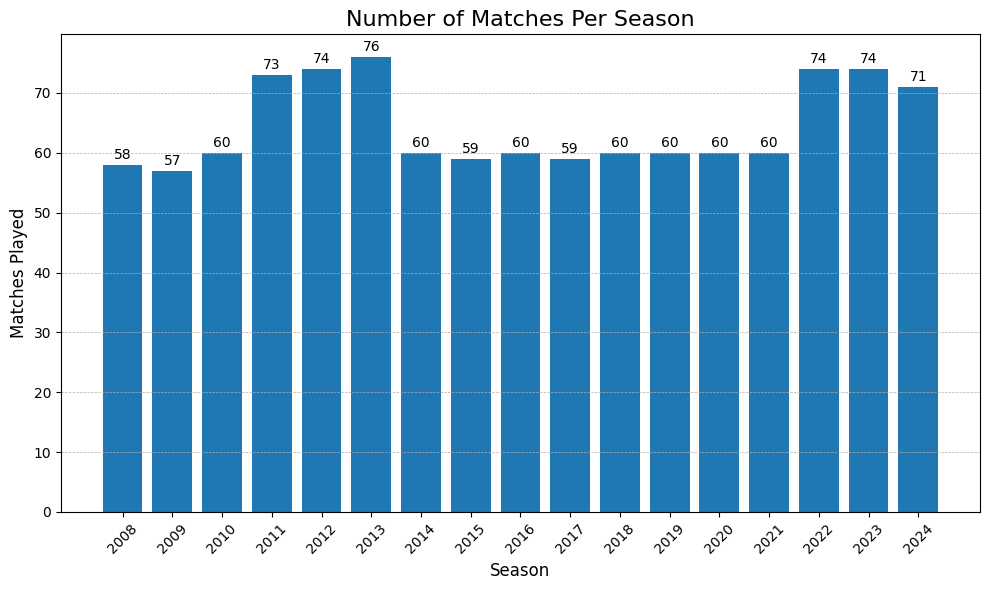

In [ ]:

season_counts = match_df['season'].value_counts().sort_index()

# Plotting as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(season_counts.index, season_counts.values)

# Titles and labels
plt.title('Number of Matches Per Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Matches Played', fontsize=12)

# Annotate each bar with its value
for i, value in enumerate(season_counts.values):
    plt.text(i, value + 1, str(value), fontsize=10, ha='center')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [ ]:
#Matches Hosted by Top 10 City
match_df['city'].value_counts().head(10)

,count
city,
Mumbai,173
Kolkata,93
Delhi,90
Chennai,85
Hyderabad,77
Bangalore,65
Chandigarh,61
Jaipur,57
Pune,51


In [ ]:
# city_counts = match_df['city'].fillna('Unknown').value_counts()

# # Plot
# plt.figure(figsize=(12, 6))
# sns.barplot(x=city_counts.index, y=city_counts.values, palette='viridis')

# plt.title('Number of Matches Hosted by Each City', fontsize=16)
# plt.xlabel('City', fontsize=12)
# plt.ylabel('Number of Matches', fontsize=12)
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

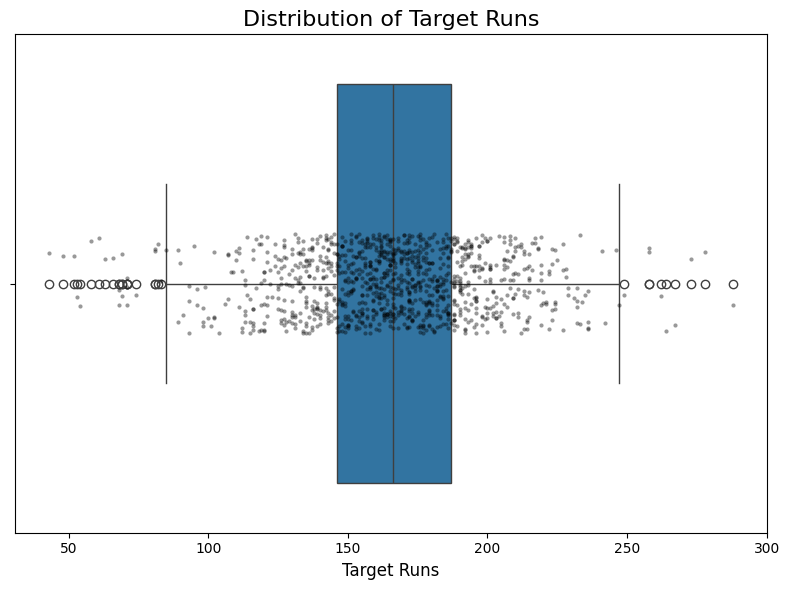

In [ ]:
mean_target_runs = match_df['target_runs'].mean()

# Creating histogram plot to show the distribution

plt.figure(figsize=(8, 6))
sns.boxplot(
    x=match_df['target_runs'].dropna(),
    whis=1.5,
    showfliers=True
)
sns.stripplot(
    x=match_df['target_runs'].dropna(),
    color='black',
    size=3,
    alpha=0.4,
    jitter=True
)

plt.title('Distribution of Target Runs', fontsize=16)
plt.xlabel('Target Runs', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
#Average Target Run in IPL Matches
print(mean_target_runs)

165.68406593406593


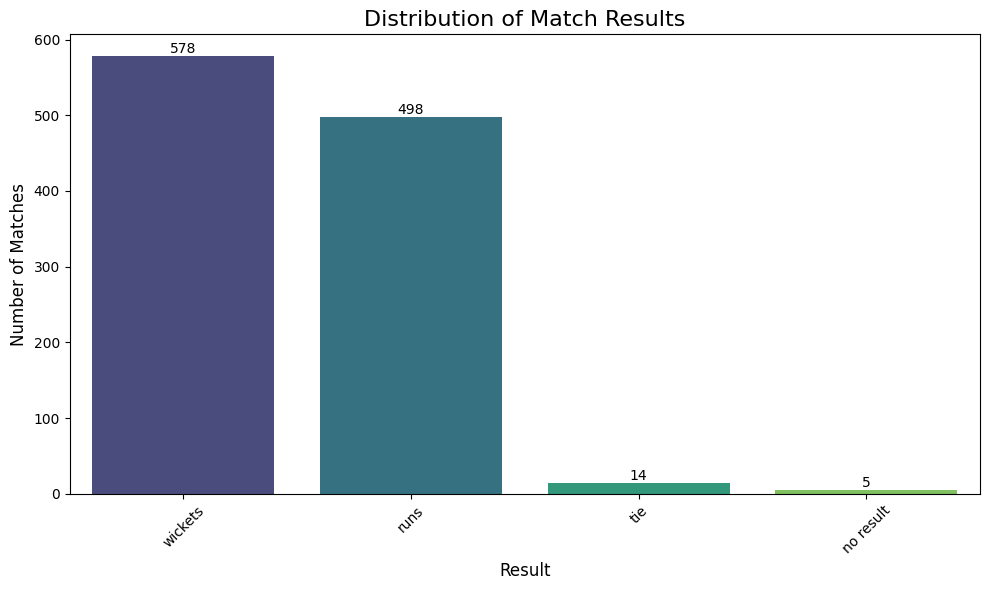

In [ ]:
# Distribution of Match Results
result_distribution = match_df['result'].value_counts()

# Creating the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=result_distribution.index, y=result_distribution.values, palette='viridis')

# Adding titles and labels
plt.title('Distribution of Match Results', fontsize=16)
plt.xlabel('Result', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)

# Showing the values on top of the bars
for index, value in enumerate(result_distribution):
    plt.text(index, value, f'{value}', ha='center', va='bottom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

  toss_decision  wins  percentage
0           bat   390   35.779817
1         field   700   64.220183


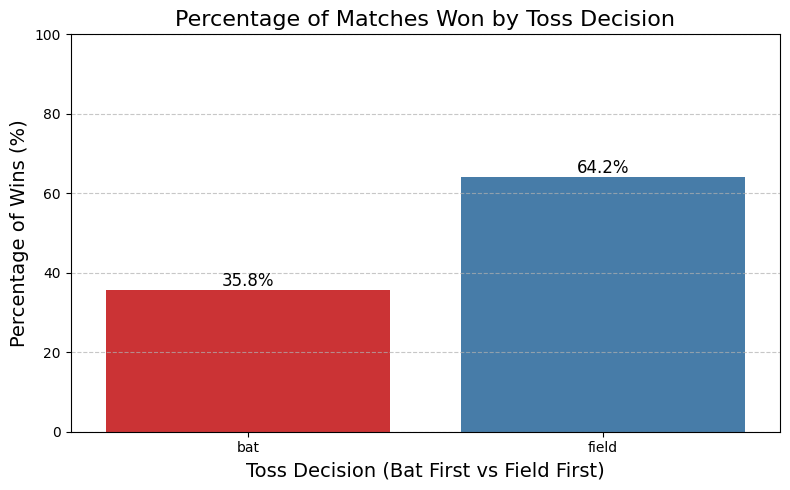

In [ ]:
clean_df = match_df.dropna(subset=['winner'])

# Grouping by toss decision and counting how often each decision leads to a win
wins_by_decision = clean_df.groupby('toss_decision').size().reset_index(name='wins')

# Calculating the percentage of matches won by teams batting first vs. fielding first
total_matches = clean_df.shape[0]
wins_by_decision['percentage'] = (wins_by_decision['wins'] / total_matches) * 100

# Displaying the result
print(wins_by_decision)

# Plotting the results
plt.figure(figsize=(8, 5))
sns.barplot(data=wins_by_decision, x='toss_decision', y='percentage', palette='Set1')

# Adding titles and labels
plt.title('Percentage of Matches Won by Toss Decision', fontsize=16)
plt.xlabel('Toss Decision (Bat First vs Field First)', fontsize=14)
plt.ylabel('Percentage of Wins (%)', fontsize=14)

# Adding values on top of the bars
for index, row in wins_by_decision.iterrows():
    plt.text(index, row['percentage'] + 1, f'{row["percentage"]:.1f}%',
             ha='center', fontsize=12)

plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#total match played by team
total_matches= (match_df['team1'].value_counts()+match_df['team2'].value_counts()).rename_axis('Team').reset_index(name="Total_Match_Played")
# Count of wins for each team
total_wins = match_df['winner'].value_counts().rename_axis('Team').reset_index(name='Total_Wins')

# Count of wins when chasing a target
team_chasing = match_df[match_df['toss_decision'] == 'field']['winner'].value_counts().rename_axis('Team').reset_index(name='Chasing_Wins')

# Count of wins when batting first
team_batting_first = match_df[match_df['toss_decision'] == 'bat']['winner'].value_counts().rename_axis('Team').reset_index(name='Batting_First_Wins')


# Merge all the DataFrames
merged_df = total_matches.merge(total_wins,on='Team',how='outer') \
    .merge(team_chasing, on='Team', how='outer') \
    .merge(team_batting_first, on='Team', how='outer')


# Fill NaN values with 0
merged_df= merged_df.fillna(0)
#sorting by total match played
merged_df.sort_values(by='Total_Match_Played', ascending=False, inplace=True)

In [ ]:
merged_df.set_index('Team', drop=True).sort_values(by='Total_Wins', ascending=False)


,Total_Match_Played,Total_Wins,Chasing_Wins,Batting_First_Wins
Team,,,,
Mumbai Indians,261,144,90,54.0
Chennai Super Kings,238,138,75,63.0
Kolkata Knight Riders,251,131,81,50.0
Royal Challengers Bangalore,255,123,85,38.0
Sunrisers Hyderabad,257,117,73,44.0
Delhi Capitals,252,115,73,42.0
Kings XI Punjab,246,112,84,28.0
Rajasthan Royals,221,112,69,43.0
Gujarat Titans,75,41,30,11.0


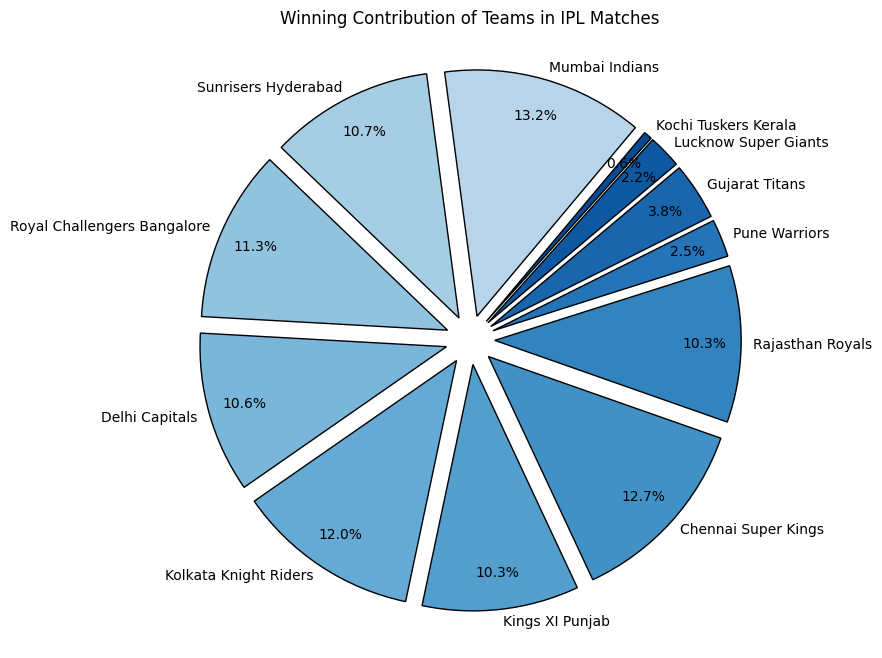

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Creating a pie chart for showing wining destribution of team in all wining matches
plt.figure(figsize=(8, 8))
explode = [0.1] * len(merged_df)
plt.pie(
    merged_df['Total_Wins'],
    labels=merged_df['Team'],
    autopct='%1.1f%%',
    startangle=50,
    colors=plt.cm.Blues(np.linspace(0.3, 0.9, len(merged_df))),
    wedgeprops={'edgecolor': 'black'},
    explode=explode,
    pctdistance=0.85,
    labeldistance=1.05
)

plt.title('Winning Contribution of Teams in IPL Matches')

# Show the pie chart
plt.show()


In [ ]:
# Create a copy of the merged DataFrame to keep the original intact
percentage_df = merged_df.copy()

# Convert columns to percentage
percentage_df['Total_Wins'] = (percentage_df['Total_Wins'] / percentage_df['Total_Match_Played']) * 100
percentage_df['Chasing_Wins'] = (percentage_df['Chasing_Wins'] / merged_df['Total_Wins']) * 100
percentage_df['Batting_First_Wins'] = (percentage_df['Batting_First_Wins'] / merged_df['Total_Wins']) * 100

In [ ]:
percentage_df.set_index('Team', drop=True).sort_values(by='Total_Wins', ascending=False)

,Total_Match_Played,Total_Wins,Chasing_Wins,Batting_First_Wins
Team,,,,
Chennai Super Kings,238,57.983193,54.347826,45.652174
Mumbai Indians,261,55.172414,62.500000,37.500000
Gujarat Titans,75,54.666667,73.170732,26.829268
Lucknow Super Giants,44,54.545455,75.000000,25.000000
Kolkata Knight Riders,251,52.191235,61.832061,38.167939
Rajasthan Royals,221,50.678733,61.607143,38.392857
Royal Challengers Bangalore,255,48.235294,69.105691,30.894309
Delhi Capitals,252,45.634921,63.478261,36.521739
Kings XI Punjab,246,45.528455,75.000000,25.000000


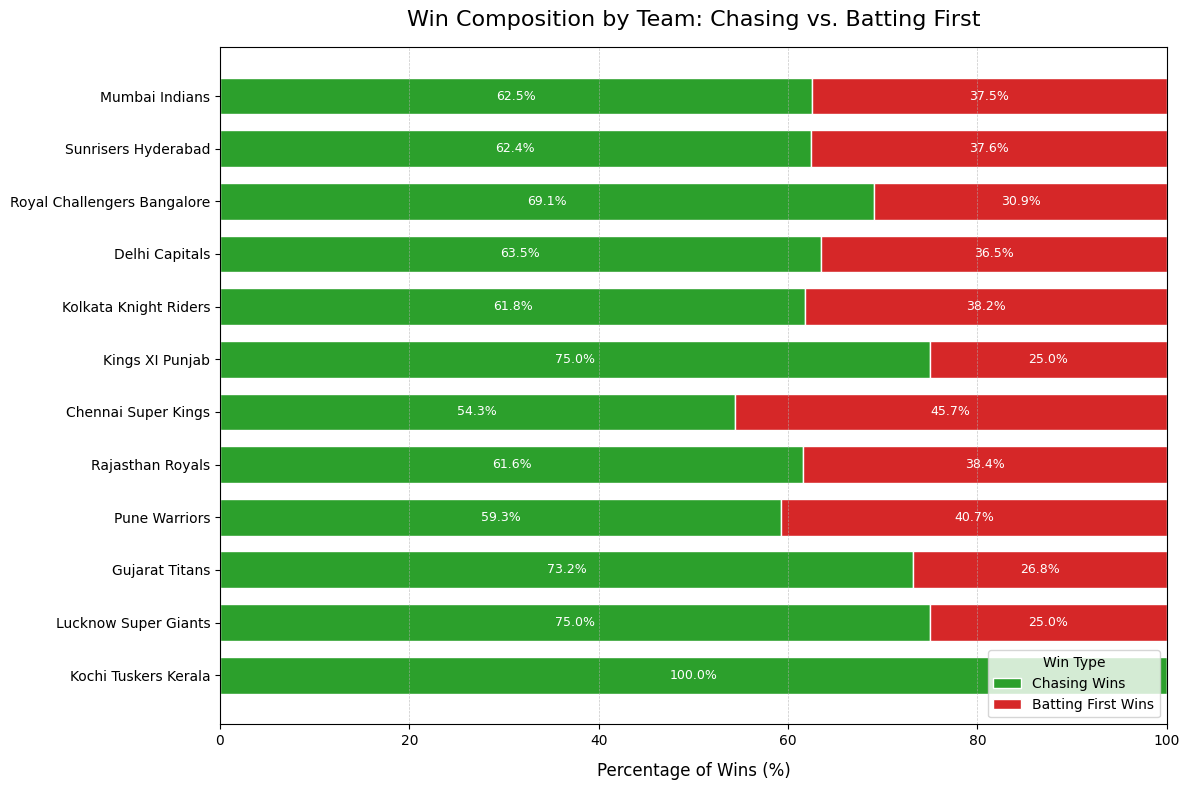

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Prepare and normalize the data
stack_df = percentage_df.set_index('Team')[['Chasing_Wins', 'Batting_First_Wins']]
stack_norm = stack_df.div(stack_df.sum(axis=1), axis=0) * 100

# Custom colors for the two segments
colors = ['#2ca02c', '#d62728']  # green for chasing, red for batting first

fig, ax = plt.subplots(figsize=(12, 8))

teams = stack_norm.index
left = np.zeros(len(stack_norm))

# Draw each segment
for idx, col in enumerate(stack_norm.columns):
    vals = stack_norm[col].values
    ax.barh(teams, vals, left=left, color=colors[idx], edgecolor='white', height=0.7, label=col.replace('_',' '))
    # Annotate inside each bar
    for i, (l, v) in enumerate(zip(left, vals)):
        if v > 3:  # only annotate if segment is wide enough
            ax.text(l + v/2, i, f"{v:.1f}%", va='center', ha='center', color='white', fontsize=9)
    left += vals

# plot
ax.set_xlim(0, 100)
ax.set_xlabel('Percentage of Wins (%)', fontsize=12, labelpad=10)
ax.set_title('Win Composition by Team: Chasing vs. Batting First', fontsize=16, pad=15)
ax.legend(title='Win Type', loc='lower right')
ax.invert_yaxis()  # highest on top
ax.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
total_matches= (match_df['team1'].value_counts()+match_df['team2'].value_counts()).rename_axis('Team').reset_index(name="Total_Match_Played")

#total toss winner teams
toss_winners=match_df['toss_winner'].value_counts().rename_axis('Team').reset_index(name='Toss_Win')

# Create the pivot table for toss decisions
team_wins_pivot = pd.pivot_table(
    data=match_df[match_df['toss_winner'] == match_df['winner']],
    index='winner',
    columns='toss_decision',
    aggfunc='size',
    fill_value=0
).rename_axis('Team').reset_index().rename(columns={'bat': 'Bat_first_win_After_Toss_Win','field':'Chasing_Win_After_Toss_Win'})

# Count of matches won by toss winners
toss_winner_matches = match_df[match_df['toss_winner'] == match_df['winner']]['winner'].value_counts().rename_axis('Team').reset_index(name='Toss_Win_Match_win')

# Merge all the DataFrames
merged_df2 = total_matches.merge(toss_winners, on='Team', how='outer') \
    .merge(toss_winner_matches, on='Team', how='outer') \
    .merge(team_wins_pivot, on='Team', how='outer')


# Fill NaN values with 0
merged_df2= merged_df2.fillna(0)
#sorting by total match played
merged_df2.sort_values(by='Total_Match_Played', ascending=False, inplace=True)


In [ ]:
# Display the final merged DataFrame
sorted_df = merged_df2.set_index('Team').sort_values(by='Toss_Win_Match_win', ascending=False)
sorted_df

,Total_Match_Played,Toss_Win,Toss_Win_Match_win,Bat_first_win_After_Toss_Win,Chasing_Win_After_Toss_Win
Team,,,,,
Mumbai Indians,261,143,78,30,48
Chennai Super Kings,238,122,75,35,40
Kolkata Knight Riders,251,122,68,20,48
Royal Challengers Bangalore,255,121,61,17,44
Delhi Capitals,252,130,61,18,43
Rajasthan Royals,221,120,60,18,42
Sunrisers Hyderabad,257,131,57,23,34
Kings XI Punjab,246,109,45,6,39
Gujarat Titans,75,37,24,3,21


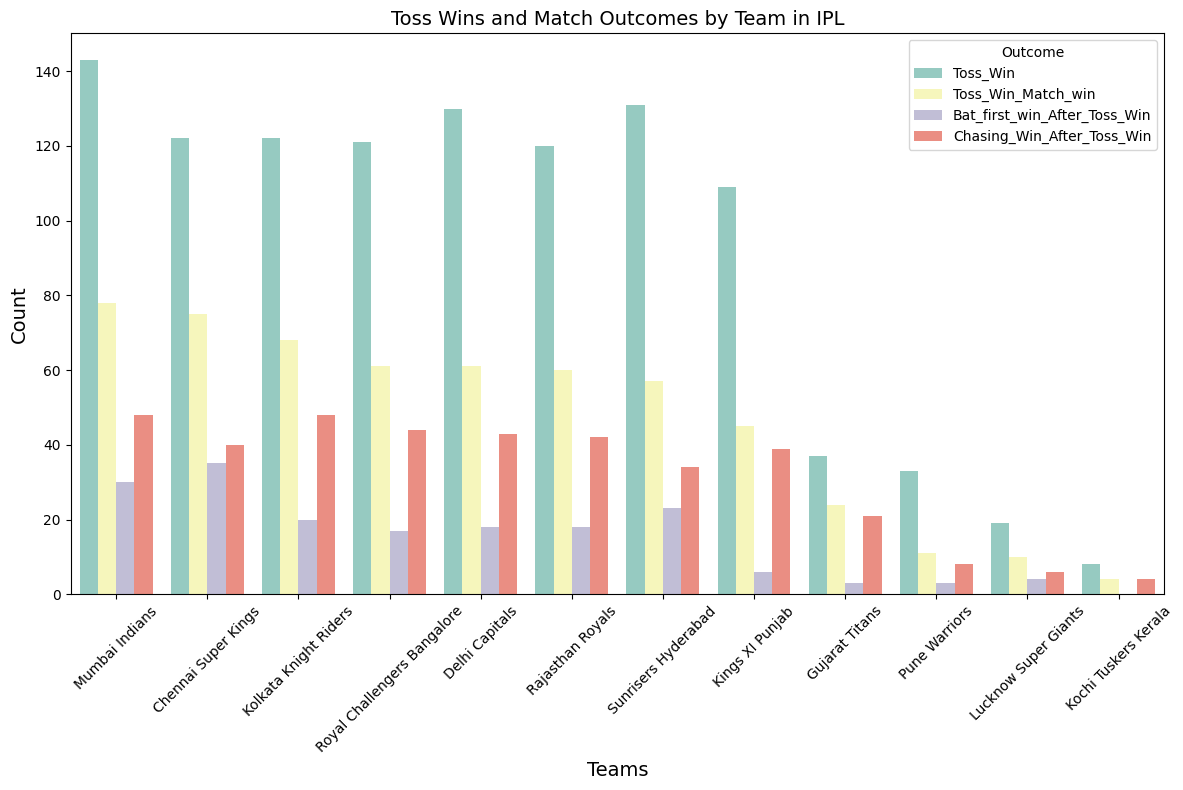

In [ ]:
# Melting the DataFrame for easier plotting
melted_df = pd.melt(
    sorted_df.reset_index(),
    id_vars=['Team'],
    value_vars=['Toss_Win', 'Toss_Win_Match_win', 'Bat_first_win_After_Toss_Win', 'Chasing_Win_After_Toss_Win'],
    var_name='Outcome',
    value_name='Count'
)

plt.figure(figsize=(12, 8))

# Creating the bar plot
sns.barplot(data=melted_df, x='Team', y='Count', hue='Outcome', palette='Set3')

# Adding labels and title
plt.xlabel('Teams',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.title('Toss Wins and Match Outcomes by Team in IPL',fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Outcome')
plt.tight_layout()
plt.show()


## **Batter Analysis**

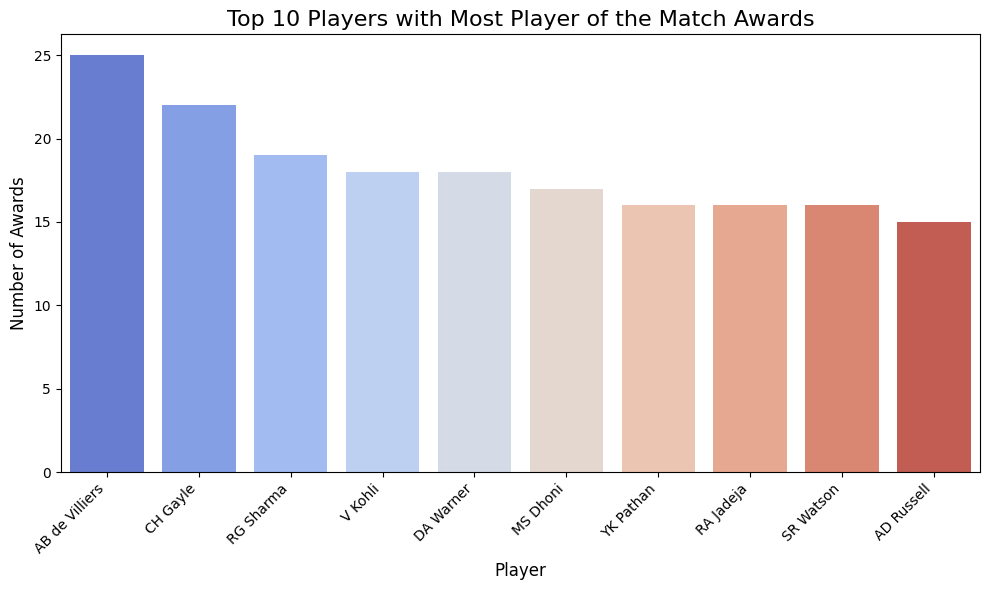

player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
V Kohli           18
DA Warner         18
MS Dhoni          17
YK Pathan         16
RA Jadeja         16
SR Watson         16
AD Russell        15
Name: count, dtype: int64


In [ ]:
#players have won the most 'Player of the Match' awards
match_df['player_of_match'].value_counts().head() #Top 5

# Ploting Top 10 Players with Most Player of the Match Awards
player_counts = match_df['player_of_match'].value_counts().head(10)

# Creating a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=player_counts.index, y=player_counts.values, palette='coolwarm')

# Adding titles and labels
plt.title('Top 10 Players with Most Player of the Match Awards', fontsize=16)
plt.xlabel('Player', fontsize=12)
plt.ylabel('Number of Awards', fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print(player_counts)

           batter  total_runs
0         V Kohli        8014
1        S Dhawan        6769
2       RG Sharma        6630
3       DA Warner        6567
4        SK Raina        5536
5        MS Dhoni        5243
6  AB de Villiers        5181
7        CH Gayle        4997
8      RV Uthappa        4954
9      KD Karthik        4843


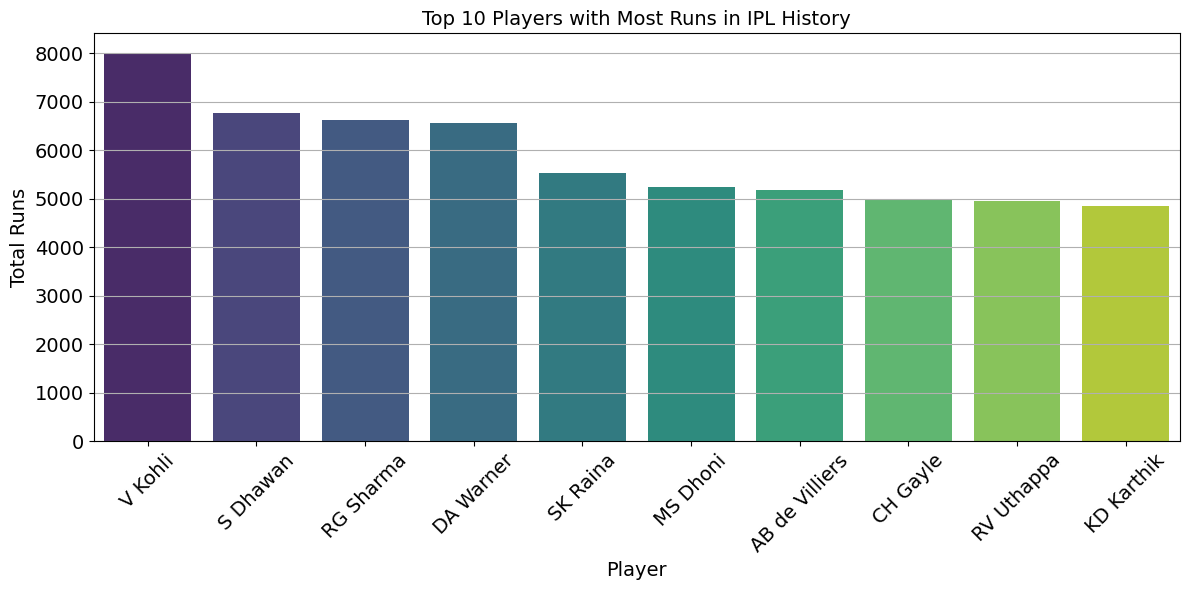

In [ ]:
player_runs = delivery_df[['batter', 'batsman_runs']]
player_runs = player_runs.groupby('batter')['batsman_runs'].sum().reset_index(name='total_runs')

# Sorting the players by total runs
top_players = player_runs.sort_values(by='total_runs', ascending=False).head(10)

print(top_players.reset_index(drop=True))

# Plotting the data
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=top_players, x='batter', y='total_runs', palette='viridis')

# Adding titles and labels
plt.title('Top 10 Players with Most Runs in IPL History', fontsize=14)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Total Runs', fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

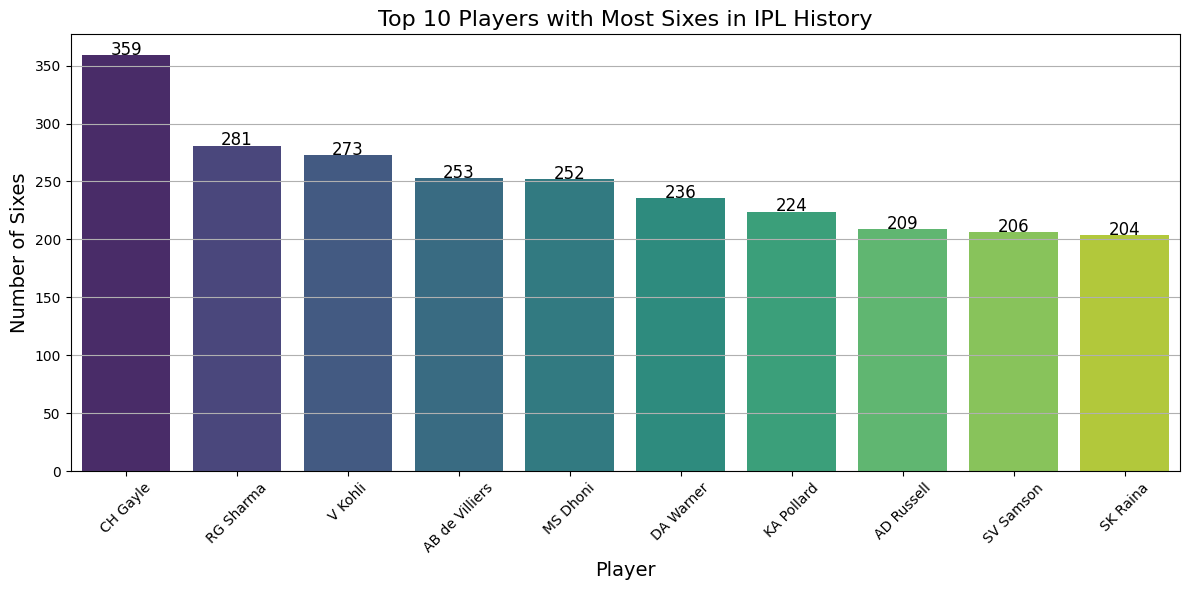

           batter  sixes
0        CH Gayle    359
1       RG Sharma    281
2         V Kohli    273
3  AB de Villiers    253
4        MS Dhoni    252
5       DA Warner    236
6      KA Pollard    224
7      AD Russell    209
8       SV Samson    206
9        SK Raina    204


In [ ]:
most_sixes = delivery_df[delivery_df['batsman_runs'] == 6]['batter'].value_counts().head(10)
most_sixes_df = most_sixes.reset_index()
most_sixes_df.columns = ['batter', 'sixes']

# Plotting the data
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=most_sixes_df, x='batter', y='sixes', palette='viridis')
for index, row in most_sixes_df.iterrows():
    bar_plot.text(index, row.sixes + 0.1, row.sixes, color='black', ha="center", fontsize=12)

# Adding titles and labels
plt.title('Top 10 Players with Most Sixes in IPL History', fontsize=16)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Number of Sixes', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()
print(most_sixes_df)

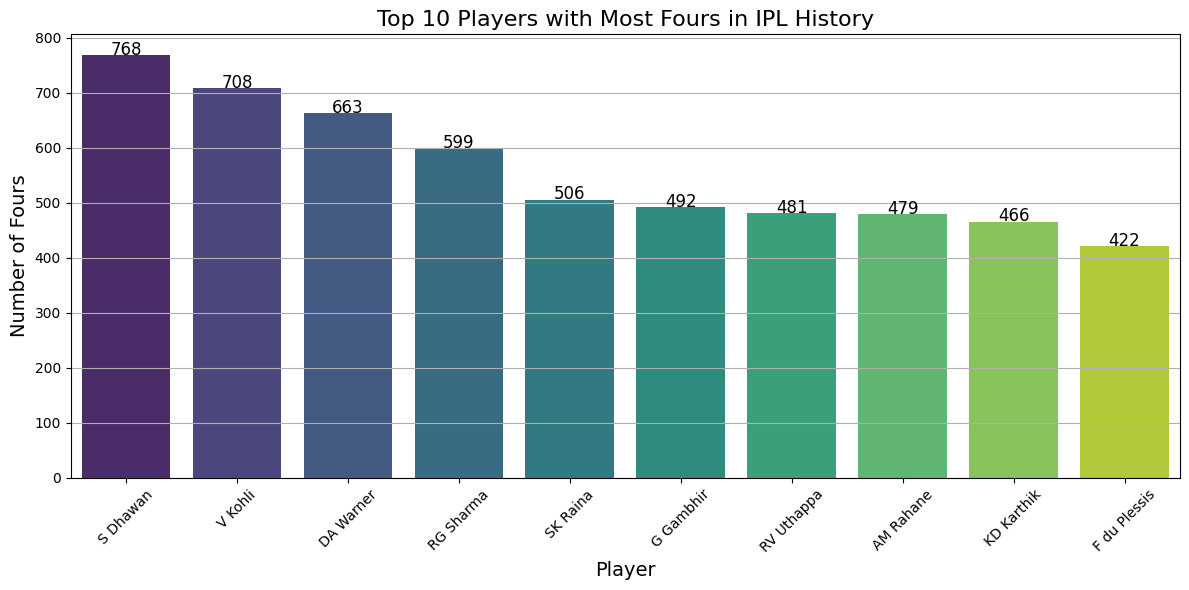

         batter  fours
0      S Dhawan    768
1       V Kohli    708
2     DA Warner    663
3     RG Sharma    599
4      SK Raina    506
5     G Gambhir    492
6    RV Uthappa    481
7     AM Rahane    479
8    KD Karthik    466
9  F du Plessis    422


In [ ]:
most_fours = delivery_df[delivery_df['batsman_runs'] == 4]['batter'].value_counts().head(10)
most_fours_df = most_fours.reset_index()
most_fours_df.columns = ['batter', 'fours']

# Plotting the data
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=most_fours_df, x='batter', y='fours', palette='viridis')
for index, row in most_fours_df.iterrows():
    bar_plot.text(index, row.fours + 0.1, row.fours, color='black', ha="center", fontsize=12)

# Adding titles and labels
plt.title('Top 10 Players with Most Fours in IPL History', fontsize=16)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Number of Fours', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()
print(most_fours_df)

In [ ]:
#Objective: batsmen have the highest average runs per match?
batter_data= delivery_df[['match_id','batter','batsman_runs']]  # Filtering Relevent Data

#Calculating the number of matches each batsman has played
batter_matches = batter_data.groupby('batter')['match_id'].nunique().reset_index(name='matches_played')

#Calculating the total runs for each batsman
batter_total_runs = batter_data.groupby('batter')['batsman_runs'].sum().reset_index(name='total_runs')

#Merging the matches played and total runs dataframes
batter_summary = pd.merge(batter_matches, batter_total_runs, on='batter')

#Calculating the average runs per match
batter_summary['Avg_runs'] = batter_summary['total_runs'] / batter_summary['matches_played']

#Filtering data for players who have played a minimum of 25 matches in the IPL for a fair comparison
batter_summary = batter_summary[batter_summary['matches_played']>=25]

# Sorting the batsmen by average runs in descending order
batter_avg = batter_summary.sort_values(by='Avg_runs', ascending=False).reset_index(drop=True)

# Displaying the result
batter_avg

,batter,matches_played,total_runs,Avg_runs
0,B Sai Sudharsan,25,1034,41.360000
1,KL Rahul,122,4689,38.434426
2,LMP Simmons,29,1079,37.206897
3,RD Gaikwad,65,2380,36.615385
4,SE Marsh,69,2489,36.072464
...,...,...,...,...
166,Z Khan,27,117,4.333333
167,UT Yadav,48,208,4.333333
168,JJ Bumrah,26,68,2.615385
169,Sandeep Sharma,25,54,2.160000


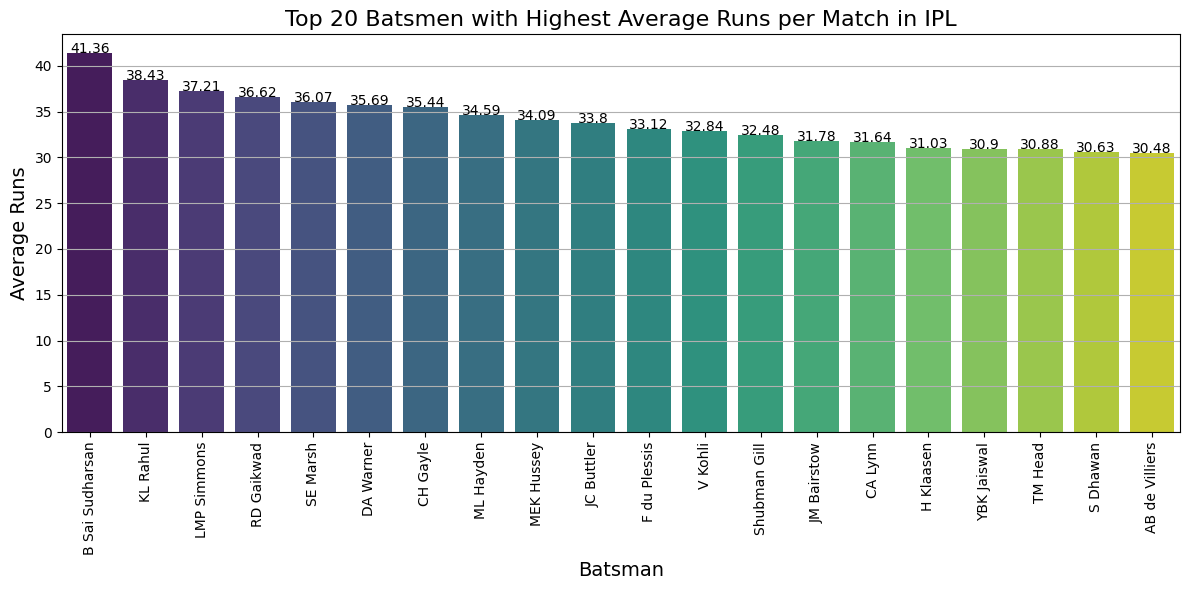

In [ ]:
#Plotting the data for top 20 batsmen with the highest average runs
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=batter_avg.head(20), x='batter', y='Avg_runs', palette='viridis')

#Annotating the bars with average runs
for index, row in batter_avg.head(20).iterrows():
    bar_plot.text(index, row.Avg_runs, round(row.Avg_runs, 2), color='black', ha="center")

# Adding titles and labels
plt.title('Top 20 Batsmen with Highest Average Runs per Match in IPL', fontsize=16)
plt.xlabel('Batsman', fontsize=14)
plt.ylabel('Average Runs', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Filtering data for final overs (overs 16 to 20)
final_overs_data = delivery_df[(delivery_df['over'] >= 16) & (delivery_df['over'] < 20)]

# Calculating runs and balls faced by each batsman in the death overs
batsman_stats = final_overs_data.groupby('batter').agg(
    runs_scored=('batsman_runs', 'sum'),
    balls_faced=('ball', 'count')
).reset_index()

# Filtering batsmen who have faced at least 150 balls for dare comparison
batsman_stats = batsman_stats[batsman_stats['balls_faced'] >= 150]

# Calculating strike rate
batsman_stats['strike_rate'] = (batsman_stats['runs_scored'] / batsman_stats['balls_faced']) * 100

# Sorting by strike rate in descending order
top_strike_rates = batsman_stats.sort_values(by='strike_rate', ascending=False).reset_index(drop=True)

# Displaying the top batsmen with the highest strike rates in final overs
top_15_strike_rates = top_strike_rates.head(15)

top_15_strike_rates

,batter,runs_scored,balls_faced,strike_rate
0,AB de Villiers,1421,635,223.779528
1,RR Pant,626,318,196.855346
2,CH Gayle,404,209,193.301435
3,V Kohli,1099,571,192.469352
4,JH Kallis,303,159,190.566038
5,H Klaasen,306,161,190.062112
6,F du Plessis,416,220,189.090909
7,RG Sharma,1176,625,188.160000
8,SA Yadav,516,276,186.956522
9,AD Russell,1065,570,186.842105


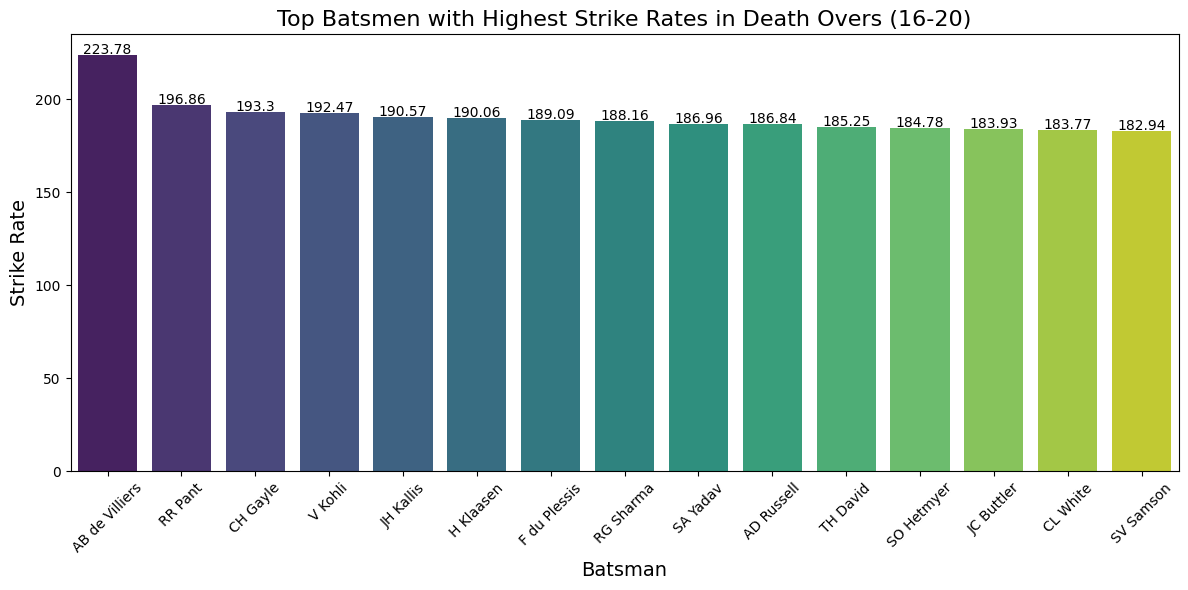

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_15_strike_rates, x='batter', y='strike_rate', palette='viridis')

# Adding title and labels
plt.title('Top Batsmen with Highest Strike Rates in Death Overs (16-20)', fontsize=16)
plt.xlabel('Batsman', fontsize=14)
plt.ylabel('Strike Rate', fontsize=14)
plt.xticks(rotation=45)

# Adding value on top of bars
for index, row in top_15_strike_rates.iterrows():
    plt.text(index, row['strike_rate'] + 0.5, round(row['strike_rate'], 2), color='black', ha='center')

plt.tight_layout()
plt.show()

In [ ]:
#Considering only who faced at least 150 balls in powerplay over for fare comparison
# Filtering for the first 6 overs
powerplay_data = delivery_df[delivery_df['over'] < 6]

# Calculating total runs and balls faced by each batsman
batsman_stats = powerplay_data.groupby('batter').agg(
    total_runs=pd.NamedAgg(column='batsman_runs', aggfunc='sum'),
    balls_faced=pd.NamedAgg(column='ball', aggfunc='count')
).reset_index()

# Calculating strike rate
batsman_stats['strike_rate'] = (batsman_stats['total_runs'] / batsman_stats['balls_faced']) * 100

# Filtering batsmen who faced at least 150 balls for fare comparison
batsman_stats = batsman_stats[batsman_stats['balls_faced'] >= 150]

# Sorting by strike rate
top_strike_rates_powerplay = batsman_stats.sort_values(by='strike_rate', ascending=False).reset_index(drop=True)

# Display the top batsmen with the highest strike rates in powerplay
top_strike_rates_powerplay=top_strike_rates_powerplay.head(15)  # Adjust the number to show more batsmen if needed
top_strike_rates_powerplay


,batter,total_runs,balls_faced,strike_rate
0,TM Head,412,211,195.260664
1,PD Salt,404,242,166.942149
2,SP Narine,946,577,163.951473
3,Abhishek Sharma,758,501,151.297405
4,YBK Jaiswal,1009,677,149.039882
5,MJ Lumb,225,157,143.312102
6,JM Bairstow,864,606,142.574257
7,P Simran Singh,499,350,142.571429
8,PP Shaw,1347,946,142.389006
9,YK Pathan,361,256,141.015625


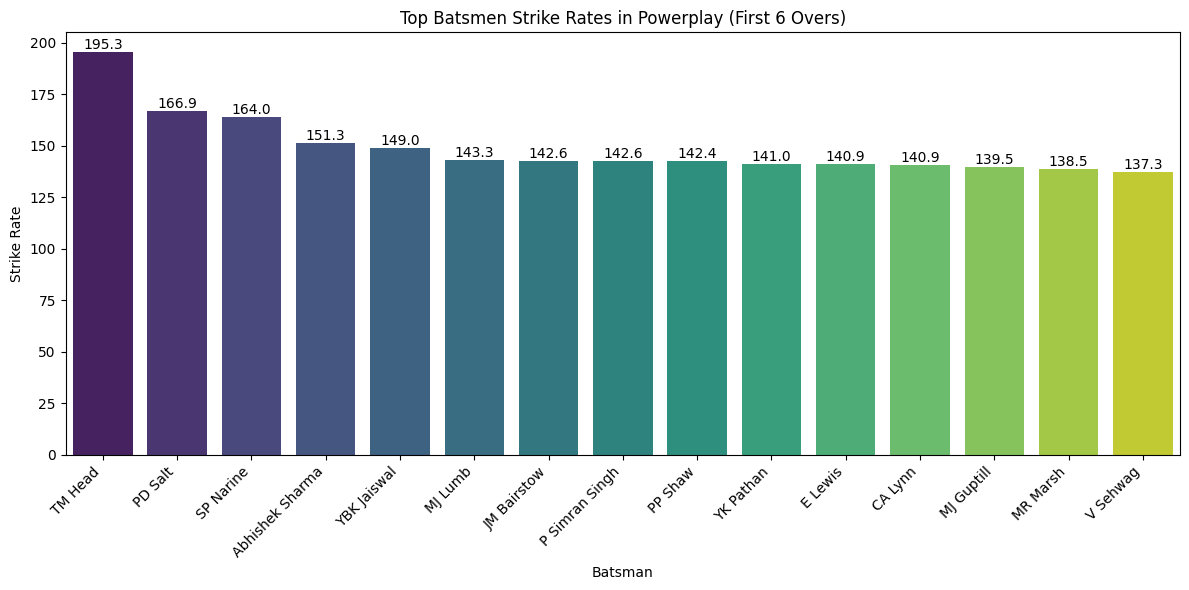

In [ ]:
 #Plotting Graph
plt.figure(figsize=(12, 6))
sns.barplot(data=top_strike_rates_powerplay, x='batter', y='strike_rate', palette='viridis')
plt.title('Top Batsmen Strike Rates in Powerplay (First 6 Overs)')
plt.xlabel('Batsman')
plt.ylabel('Strike Rate')
plt.xticks(rotation=45, ha='right')

# Adding values on top of bars
for index, value in enumerate(top_strike_rates_powerplay['strike_rate']):
    plt.text(index, value, f'{value:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# Make sure 'season' is numeric
match_df['season'] = match_df['season'].astype(int)

# Find the last five seasons
last5 = sorted(match_df['season'].unique())[-5:]

# Restrict matches to those seasons
recent_match_ids = match_df.loc[match_df['season'].isin(last5), 'id']

# Subset deliveries
recent_deliv = delivery_df[delivery_df['match_id'].isin(recent_match_ids)]

# Sum runs per batsman
runs = (
    recent_deliv
    .groupby('batter', as_index=False)['batsman_runs']
    .sum()
    .rename(columns={'batsman_runs':'total_runs'})
)

# Grab top 5
top5_batsmen = runs.nlargest(5, 'total_runs')

print(f"Top 5 run-scorers in seasons {last5}:")
print(top5_batsmen.to_string(index=False))

Top 5 run-scorers in seasons [np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]:
      batter  total_runs
F du Plessis        2718
Shubman Gill        2717
    KL Rahul        2712
     V Kohli        2597
  RD Gaikwad        2380


In [ ]:
print(last5)
print(top5_batsmen)


[np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]
           batter  total_runs
77   F du Plessis        2718
279  Shubman Gill        2717
130      KL Rahul        2712
301       V Kohli        2597
224    RD Gaikwad        2380


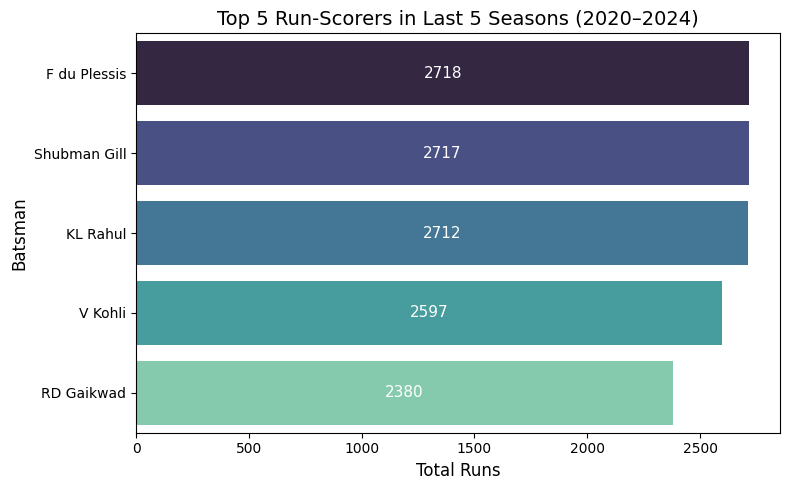

In [ ]:

# Reset index so bars are at y=0…4
plot_df = top5_batsmen.reset_index(drop=True)

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=plot_df,
    x='total_runs',
    y='batter',
    palette='mako'
)

plt.title(f"Top 5 Run‐Scorers in Last 5 Seasons ({last5[0]}–{last5[-1]})", fontsize=14)
plt.xlabel("Total Runs", fontsize=12)
plt.ylabel("Batsman", fontsize=12)

# Annotate each bar by iterating over the Patch objects
for bar in ax.patches:
    width = bar.get_width()
    y_center = bar.get_y() + bar.get_height() / 2
    ax.text(
        width / 2,
        y_center,
        f"{int(width)}",
        ha='center',
        va='center',
        color='white',
        fontsize=11
    )

plt.tight_layout()
plt.show()


## **Bowler Analysis**

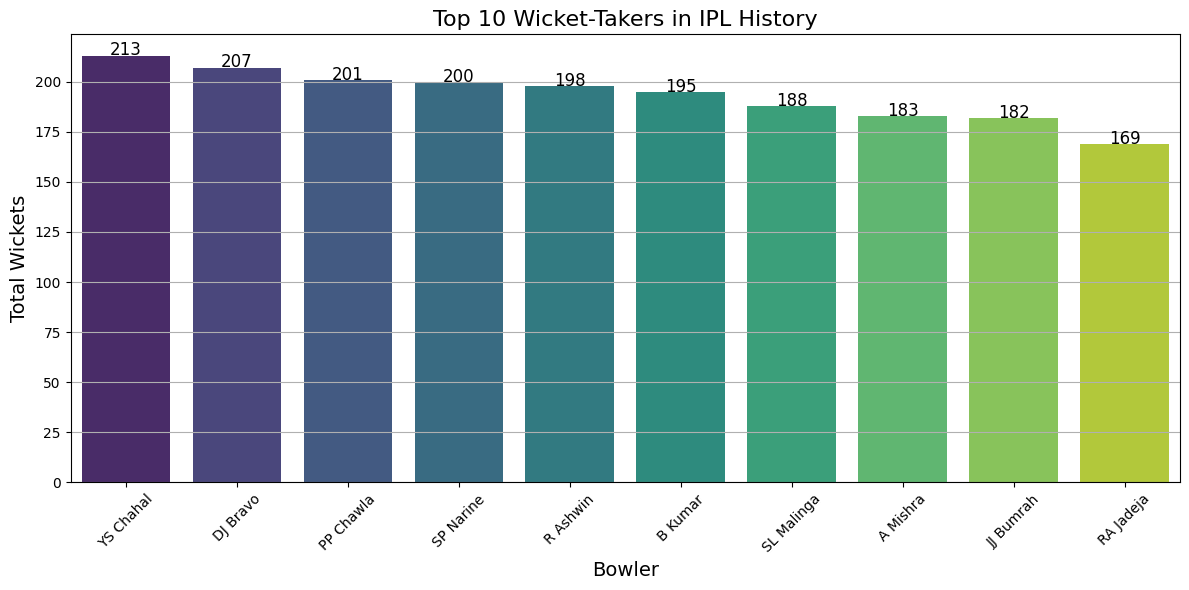

In [ ]:
most_wicket_taker = delivery_df[['bowler', 'is_wicket']]
most_wicket_taker = most_wicket_taker.groupby('bowler')['is_wicket'].sum().reset_index(name='total_wicket')
most_wicket_taker = most_wicket_taker.sort_values(by='total_wicket', ascending=False).reset_index(drop=True)

#top 10 wicket-takers
top_wicket_takers = most_wicket_taker.head(10)

# Plotting the data
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=top_wicket_takers, x='bowler', y='total_wicket', palette='viridis')

# Annotate the bars with total wickets
for index, row in top_wicket_takers.iterrows():
    bar_plot.text(index, row.total_wicket + 0.1, row.total_wicket, color='black', ha="center", fontsize=12)

# Adding titles and labels
plt.title('Top 10 Wicket-Takers in IPL History', fontsize=16)
plt.xlabel('Bowler', fontsize=14)
plt.ylabel('Total Wickets', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [ ]:
#Top 15 Most Economical Bowlers
#Calculating total runs conceded by each bowler
runs_conceded = delivery_df.groupby('bowler')['batsman_runs'].sum().reset_index(name='runs_conceded')

#Filtering out wides and no balls and calculating total overs bowled by each bowler
#Only counting legitimate deliveries - excluding wides and no balls
valid_deliveries = delivery_df[~delivery_df['extras_type'].isin(['wides', 'noballs'])]

# Counting the number of balls bowled for valid deliveries
balls_bowled = valid_deliveries.groupby('bowler')['ball'].count().reset_index(name='balls_bowled')
balls_bowled['overs_bowled'] = balls_bowled['balls_bowled'] / 6

#Merging runs conceded and balls bowled data
bowler_stats = pd.merge(runs_conceded, balls_bowled[['bowler', 'overs_bowled']], on='bowler', how='left')

#Calculating the economy rate
bowler_stats['economy_rate'] = bowler_stats['runs_conceded'] / bowler_stats['overs_bowled']

#filtring data for those have minimum over bowled 60 for fare comparision
bowler_stats = bowler_stats[bowler_stats['overs_bowled']>=60]
#Sorting the bowlers by economy rate
most_economical_bowlers = bowler_stats.sort_values(by='economy_rate').reset_index(drop=True)

# Displaying the top bowlers with lowest economy rates
top_15_most_economical_bowlers = most_economical_bowlers.head(15)

# Display the result
top_15_most_economical_bowlers

,bowler,runs_conceded,overs_bowled,economy_rate
0,A Kumble,1027,160.833333,6.385492
1,M Muralitharan,1642,254.666667,6.447644
2,RE van der Merwe,486,73.833333,6.582393
3,SP Narine,4492,680.166667,6.604264
4,DW Steyn,2406,363.666667,6.615949
5,J Yadav,437,65.000000,6.723077
6,DL Vettori,871,129.500000,6.725869
7,Rashid Khan,3222,478.666667,6.731198
8,MJ Santner,411,61.000000,6.737705
9,J Botha,781,115.666667,6.752161


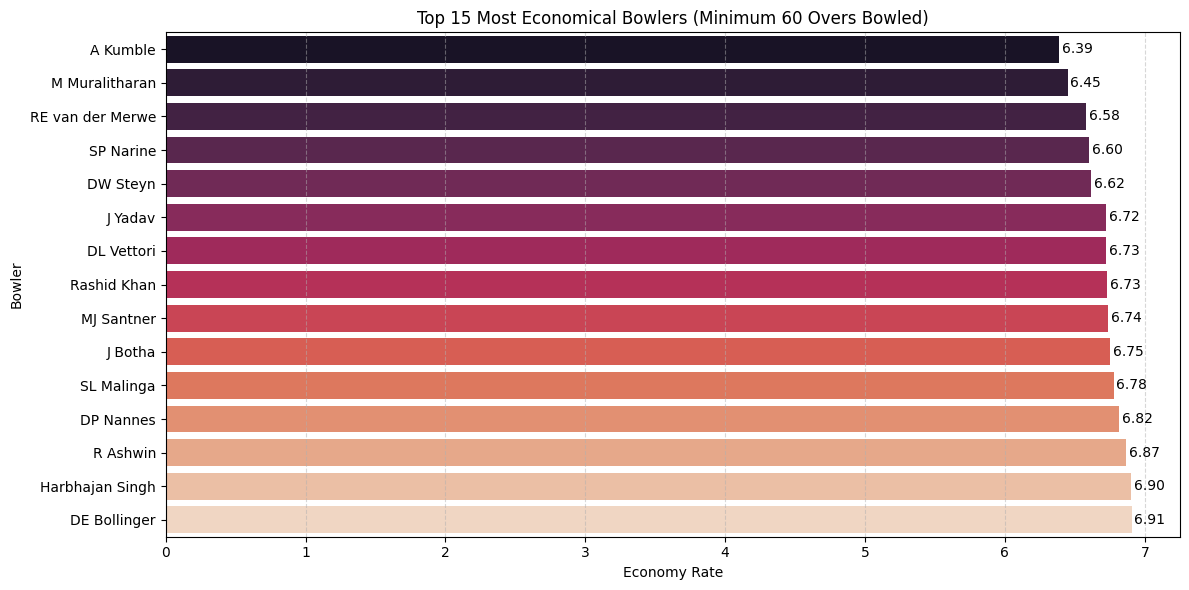

In [ ]:
# top_15_most_economical_bowler
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(
    data=top_15_most_economical_bowlers,
    x='economy_rate',
    y='bowler',
    palette='rocket'
)

plt.title('Top 15 Most Economical Bowlers (Minimum 60 Overs Bowled)')
plt.xlabel('Economy Rate')
plt.ylabel('Bowler')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Annotate bars
for index, row in top_15_most_economical_bowlers.iterrows():
    bar_plot.text(
        row['economy_rate'] + 0.02,
        index,
        f"{row['economy_rate']:.2f}",
        va='center'
    )

plt.tight_layout()
plt.show()

In [ ]:
most_expensive_bowlers= bowler_stats.sort_values(by='economy_rate', ascending=False).head(15).reset_index(drop=True)
most_expensive_bowlers

,bowler,runs_conceded,overs_bowled,economy_rate
0,Mukesh Kumar,673,66.500000,10.120301
1,Yash Thakur,663,67.333333,9.846535
2,Kartik Tyagi,675,70.333333,9.597156
3,Basil Thampi,828,86.833333,9.535509
4,SM Curran,1847,196.833333,9.383573
5,MP Stoinis,1240,133.833333,9.265255
6,AS Joseph,669,72.333333,9.248848
7,Shahbaz Ahmed,825,89.500000,9.217877
8,CJ Jordan,1033,112.333333,9.195846
9,TU Deshpande,1184,129.000000,9.178295


 Top 5 bowlers in seasons [np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]:
        bowler  wickets
     YS Chahal      105
   Rashid Khan       94
      HV Patel       92
      K Rabada       88
Mohammed Shami       87


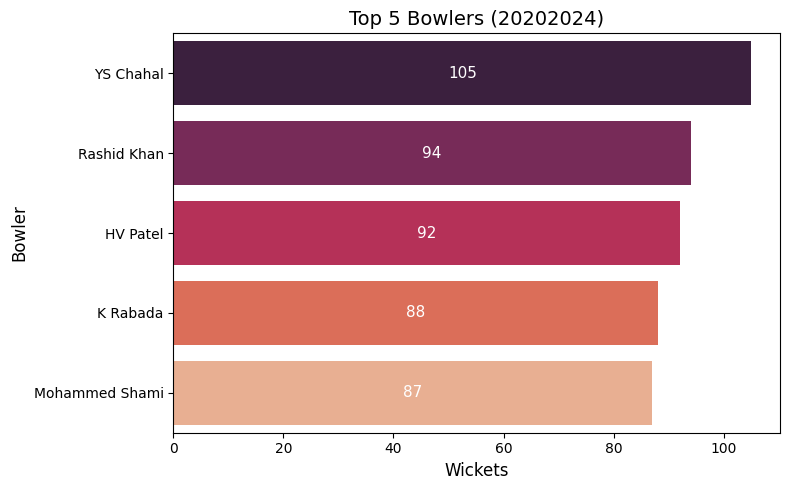

In [ ]:
match_df['season'] = match_df['season'].astype(int)

# 2) Find the last five seasons
last5 = sorted(match_df['season'].unique())[-5:]

# 3) Get all match IDs from those seasons
recent_ids = match_df.loc[match_df['season'].isin(last5), 'id']

# 4) Subset your deliveries
recent_deliv = delivery_df[delivery_df['match_id'].isin(recent_ids)]

# 5) Define what counts as a wicket
dismissal_kinds = [
    'bowled',
    'caught',
    'lbw',
    'stumped',
    'caught and bowled',
    'hit wicket'
]

# 6) Filter for those wicket deliveries and count per bowler
wickets_df = recent_deliv[recent_deliv['dismissal_kind'].isin(dismissal_kinds)]
wickets_count = (
    wickets_df
    .groupby('bowler', as_index=False)
    .size()
    .rename(columns={'size':'wickets'})
)

# 7) Take your Top 5
top5_bowlers = wickets_count.sort_values('wickets', ascending=False).head(5)

print(f" Top 5 bowlers in seasons {last5}:")
print(top5_bowlers.to_string(index=False))


# horizontal bar chart
plot_df = top5_bowlers.reset_index(drop=True)
plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=plot_df,
    x='wickets',
    y='bowler',
    palette='rocket'
)
plt.title(f"Top 5 Bowlers ({last5[0]}{last5[-1]})", fontsize=14)
plt.xlabel("Wickets", fontsize=12)
plt.ylabel("Bowler", fontsize=12)

# draw labels inside bars
for bar in ax.patches:
    w = bar.get_width()
    y = bar.get_y() + bar.get_height()/2
    ax.text(
        w/2, y,
        f"{int(w)}",
        ha='center', va='center',
        color='white', fontsize=11
    )

plt.tight_layout()
plt.show()

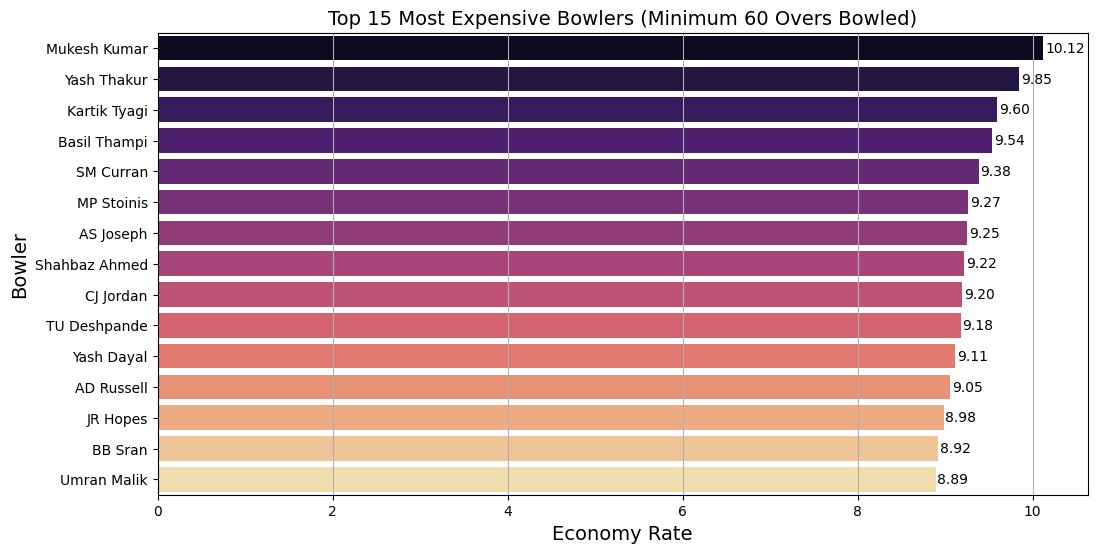

In [ ]:
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=most_expensive_bowlers, x='economy_rate', y='bowler', palette='magma')
plt.title('Top 15 Most Expensive Bowlers (Minimum 60 Overs Bowled)',fontsize=14)
plt.xlabel('Economy Rate',fontsize=14)
plt.ylabel('Bowler', fontsize=14)
plt.grid(axis='x')

# Annotating bars with their respective values
for index, row in most_expensive_bowlers.iterrows():
    bar_plot.text(row['economy_rate'] + 0.02, index, f"{row['economy_rate']:.2f}", color='black', ha="left", va="center")

plt.show()

In [ ]:
# Filtering the data for death overs (over 16 to 20)
death_overs = delivery_df[(delivery_df['over'] >= 16) & (delivery_df['over'] <= 20)]

# Grouping by bowler and summing the wickets taken
wickets_in_death_overs = death_overs.groupby('bowler')['is_wicket'].sum().reset_index(name='total_wickets')

# Sorting the bowlers by total wickets in descending order
most_wickets_death_overs = wickets_in_death_overs.sort_values(by='total_wickets', ascending=False)

# Getting the top 15 bowlers with most wickets in death overs
top_bowlers_death_overs = most_wickets_death_overs.head(15).reset_index(drop=True)

# Displayong the result
top_bowlers_death_overs

,bowler,total_wickets
0,DJ Bravo,115
1,SL Malinga,104
2,B Kumar,93
3,JJ Bumrah,89
4,HV Patel,74
5,MM Sharma,72
6,Mohammed Shami,69
7,SP Narine,69
8,CH Morris,61
9,R Vinay Kumar,58


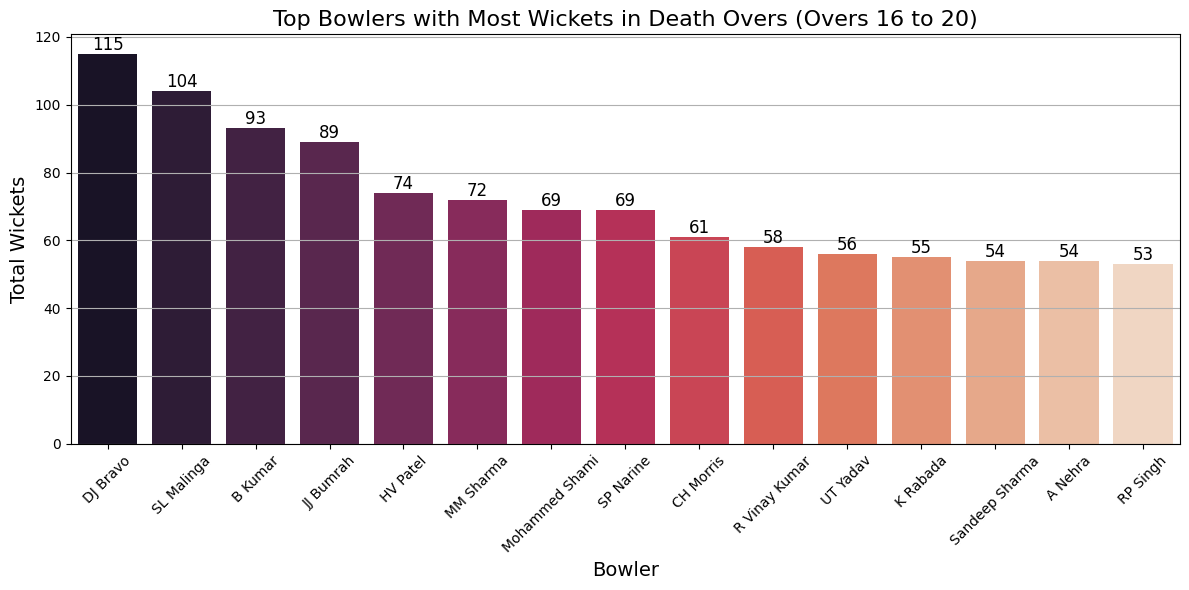

In [ ]:
# Plotting the top 15 bowlers who took most wickets in death overs
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_bowlers_death_overs, x='bowler', y='total_wickets', palette='rocket')

# Adding titles and labels
plt.title('Top Bowlers with Most Wickets in Death Overs (Overs 16 to 20)', fontsize=16)
plt.xlabel('Bowler', fontsize=14)
plt.ylabel('Total Wickets', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding value on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# Filtering data for powerplay overs (overs 0 to 5)
powerplay_data = delivery_df[(delivery_df['over'] >= 0) & (delivery_df['over'] < 6)]

# Counting wickets taken by each bowler in the powerplay
wickets_powerplay = powerplay_data[powerplay_data['is_wicket'] == 1].groupby('bowler')['is_wicket'].count().reset_index(name='total_wickets')

# Sorting the bowlers by total wickets taken
top_bowlers_powerplay = wickets_powerplay.sort_values(by='total_wickets', ascending=False).reset_index(drop=True)

# Displaying the top 15 bowlers with the most wickets in powerplay
top_bowlers_powerplay = top_bowlers_powerplay.head(15)
top_bowlers_powerplay

,bowler,total_wickets
0,B Kumar,77
1,TA Boult,63
2,Sandeep Sharma,63
3,UT Yadav,61
4,DL Chahar,60
5,I Sharma,60
6,Z Khan,58
7,R Ashwin,53
8,Mohammed Shami,51
9,DS Kulkarni,46


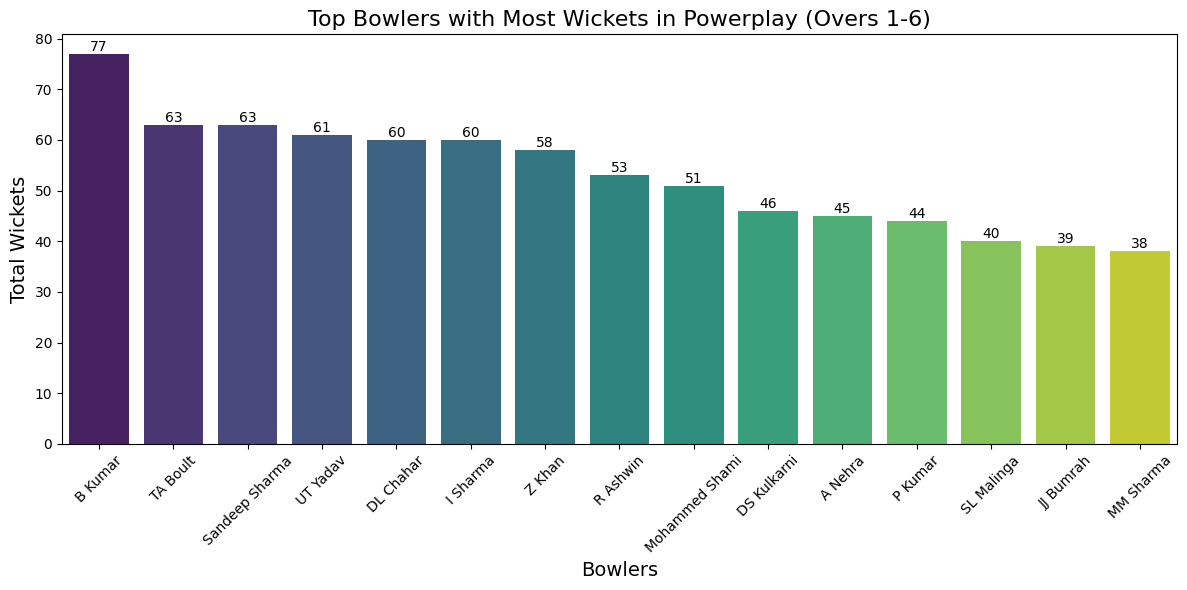

In [ ]:
# Plotting the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x='bowler', y='total_wickets', data=top_bowlers_powerplay, palette='viridis')
plt.title('Top Bowlers with Most Wickets in Powerplay (Overs 1-6)', fontsize=16)
plt.xlabel('Bowlers', fontsize=14)
plt.ylabel('Total Wickets', fontsize=14)
plt.xticks(rotation=45)

# Adding the values on top of the bars
for index, value in enumerate(top_bowlers_powerplay['total_wickets']):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# Creating Function to check most run scorer batsman against Bowler
def top_batsmen_against_bowler(bowler_name):
    # Filter the DataFrame for deliveries bowled by the specific bowler
    deliveries_by_bowler = delivery_df[delivery_df['bowler'] == bowler_name]

    # Grouping by batsman and suming the total runs scored against the bowler
    batsman_runs = deliveries_by_bowler.groupby('batter')['batsman_runs'].sum().reset_index(name='runs_scored')

    # Sorting by runs scored and get the top 10 batsmen
    top_10_batsmen = batsman_runs.sort_values(by='runs_scored', ascending=False).head(10)

    # Plotting using seaborn
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='batter', y='runs_scored', data=top_10_batsmen, palette='Blues_d')

    # Adding values on top of bars
    for bar in ax.patches:
        ax.annotate(format(bar.get_height(), '.0f'),
                    (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                    ha='center', va='center', size=12, xytext=(0, 8),
                    textcoords='offset points')

    # Customizing plot aesthetics
    plt.title(f'Top 10 Batsmen Scoring Most Runs Against {bowler_name}', fontsize=16)
    plt.xlabel('Batsman', fontsize=14)
    plt.ylabel('Runs Scored', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=14)  # Rotate x-axis labels and adjust font size
    plt.tight_layout()
    plt.show()

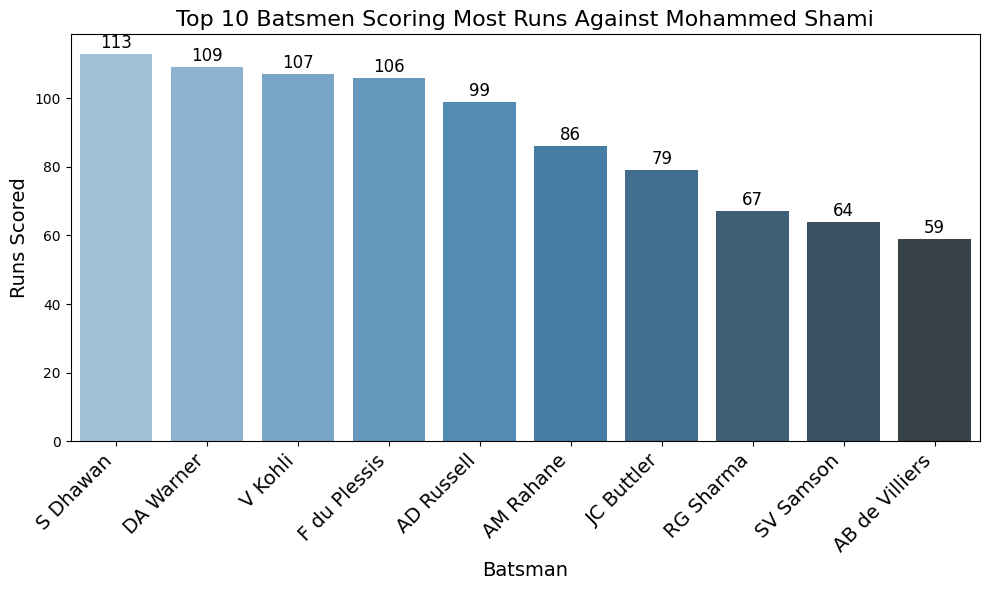

In [ ]:
# Checking Most run scorer batsman against Mohammed Shami
top_batsmen_against_bowler('Mohammed Shami')

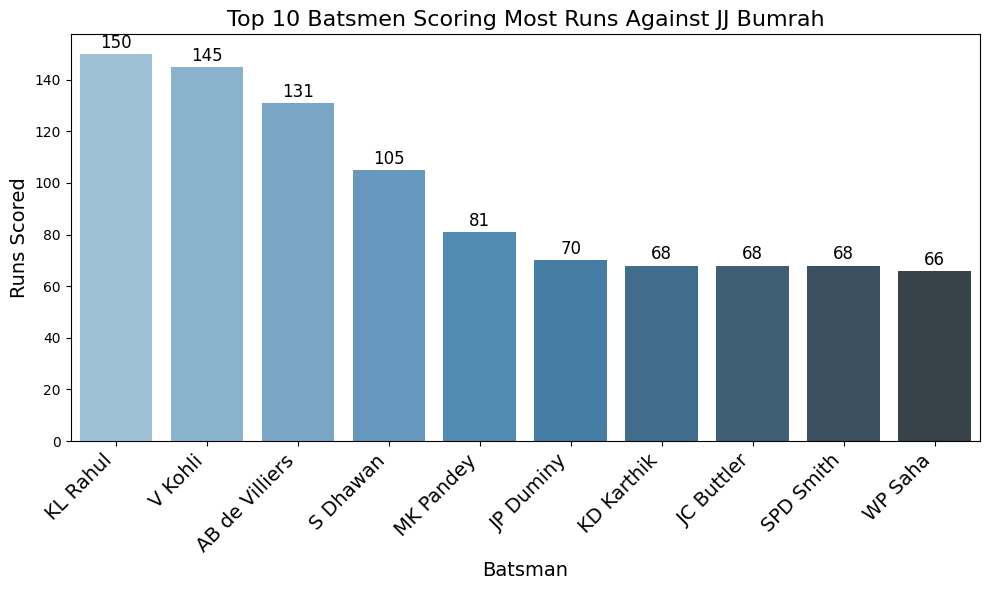

In [ ]:
# Checking Most run scorer batsman against Jasprit Bumrah
top_batsmen_against_bowler('JJ Bumrah')

## Fielding Anlysis

In [ ]:
# Filtering the data for deliveries where a wicket was taken
dismissals = delivery_df[delivery_df['is_wicket'] == 1]

# Grouping by dismissal type and count the number of each type
dismissal_counts = dismissals.groupby('dismissal_kind')['is_wicket'].count().reset_index(name='count')

# Sorting the dismissal types by their count in descending order
dismissal_counts = dismissal_counts.sort_values(by='count', ascending=False)
#dismissal_counts

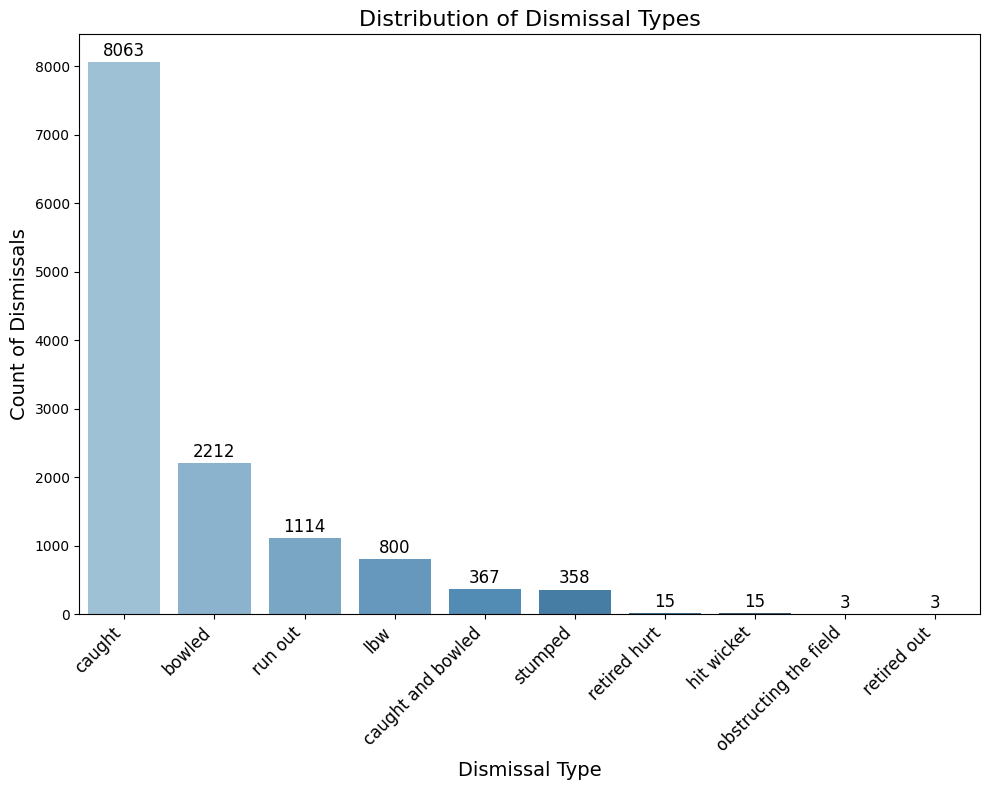

In [ ]:
# Plotting the distribution of dismissal types
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='dismissal_kind', y='count', data=dismissal_counts, palette='Blues_d')

# Adding values on top of bars
for bar in ax.patches:
    ax.annotate(format(bar.get_height(), '.0f'),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', size=12, xytext=(0, 8),
                textcoords='offset points')


plt.title('Distribution of Dismissal Types', fontsize=16)
plt.xlabel('Dismissal Type', fontsize=14)
plt.ylabel('Count of Dismissals', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotate x-axis labels
plt.tight_layout()
plt.show()

In [ ]:

# Ensure 'season' is numeric
match_df['season'] = match_df['season'].astype(int)

# Identify the last five seasons
last5 = sorted(match_df['season'].unique())[-5:]

# Filter for those seasons’ match IDs
recent_ids = match_df.loc[match_df['season'].isin(last5), 'id']

# Subset your deliveries
recent_deliv = delivery_df[delivery_df['match_id'].isin(recent_ids)]

#  Keep only catch dismissals
catch_kinds = ['caught', 'caught and bowled']
catches = recent_deliv[recent_deliv['dismissal_kind'].isin(catch_kinds)]

# Count catches per fielder
catch_counts = (
    catches
    .groupby('fielder', as_index=False)
    .size()
    .rename(columns={'size':'catches'})
)

#  Get the top catcher
top_catcher = catch_counts.sort_values('catches', ascending=False).head(5)

print(f" Top catcher in seasons {last5}:\n", top_catcher.to_string(index=False))

 Top catcher in seasons [np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024)]:
      fielder  catches
    MS Dhoni       54
    KL Rahul       49
     RR Pant       42
     V Kohli       41
F du Plessis       39


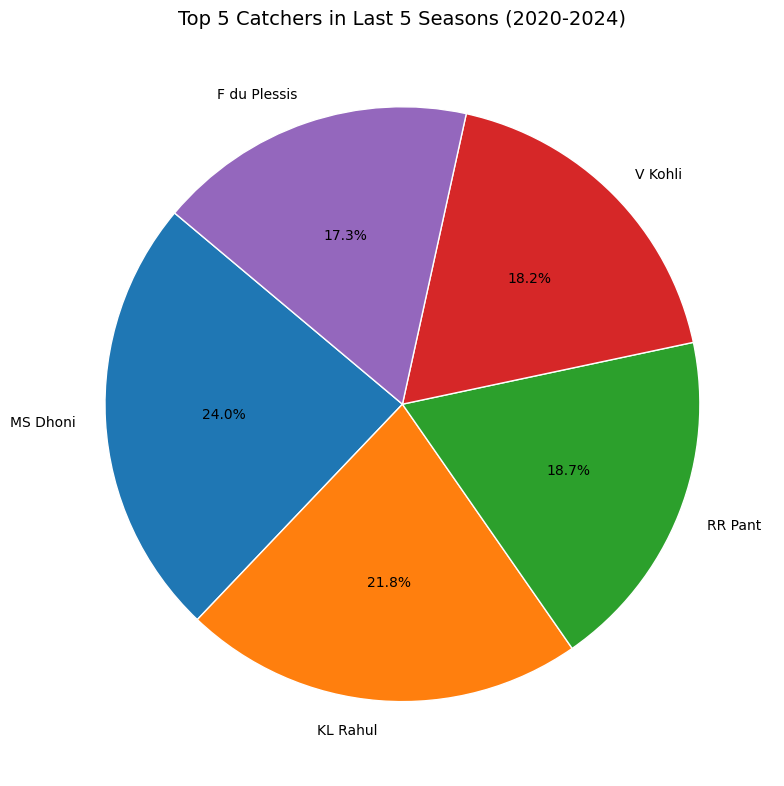

In [ ]:
# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_catcher['catches'],
    labels=top_catcher['fielder'],
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)
plt.title(f'Top 5 Catchers in Last 5 Seasons ({last5[0]}-{last5[-1]})', fontsize=14)
plt.tight_layout()
plt.show()


# Model Builidng & Feature Engineering

In [ ]:
delivery_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [ ]:
match_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2008,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2008,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2008,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2008,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2008,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
#  Merge both dataframe
final_df = delivery_df.merge(
    match_df,
    left_on='match_id',
    right_on='id',
    how='left',
    suffixes=('_delivery', '_match')
)

#  Drop the now‐redundant 'id' column, keeping only 'match_id'
final_df = final_df.drop(columns=['id'])


print(final_df.shape)
print(final_df.columns)
print(final_df.head())


(260920, 36)
Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder', 'season', 'city', 'date', 'match_type',
       'player_of_match', 'venue', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'winner', 'result', 'result_margin', 'target_runs',
       'target_overs', 'super_over', 'method', 'umpire1', 'umpire2'],
      dtype='object')
   match_id  inning           batting_team                 bowling_team  over  \
0    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
1    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
2    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
3    335982       1  Kolkata Knight Riders  Royal Challengers Bangalore     0   
4    335982       1  Kolkata Knight Riders  Royal Ch

In [ ]:
final_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen


In [ ]:
final_df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,...,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,...,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,...,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,...,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,NaN,J Madanagopal,Nitin Menon


In [ ]:
final_df.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


In [ ]:
cols_to_fill = ['extras_type', 'player_dismissed', 'dismissal_kind', 'fielder','method']
for col in cols_to_fill:
    final_df[col] = final_df[col].fillna(0)


print(final_df[cols_to_fill].isnull().sum())

extras_type         0
player_dismissed    0
dismissal_kind      0
fielder             0
method              0
dtype: int64


In [ ]:
# List of columns to check
cols_to_drop = ['winner', 'result_margin', 'target_runs', 'target_overs','player_of_match']

# Drop any row with NaN in these columns
final_df = final_df.dropna(subset=cols_to_drop)

# Verify no more NaNs in those columns
print(final_df[cols_to_drop].isnull().sum())
print("New shape:", final_df.shape)


winner             0
result_margin      0
target_runs        0
target_overs       0
player_of_match    0
dtype: int64
New shape: (256796, 36)


In [ ]:
final_df.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,0
non_striker,0
batsman_runs,0


In [ ]:
final_df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,0,Asad Rauf,RE Koertzen
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,0,Asad Rauf,RE Koertzen
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,0,Asad Rauf,RE Koertzen
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,0,Asad Rauf,RE Koertzen
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,0,Asad Rauf,RE Koertzen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,...,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,0,J Madanagopal,Nitin Menon
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,...,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,0,J Madanagopal,Nitin Menon
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,...,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,0,J Madanagopal,Nitin Menon
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,...,bat,Kolkata Knight Riders,wickets,8.0,114.0,20.0,N,0,J Madanagopal,Nitin Menon


In [ ]:
import pandas as pd

final_feats = ['bat_avg','bowl_avg','top5_runs_sum','top5_wkts_sum']  # <- edit if needed
desc_map = {
    'bat_avg': 'Team batting average in the season (runs / dismissals).',
    'bowl_avg': 'Team bowling average in the season (runs conceded / wickets).',
    'top5_runs_sum': 'Sum of runs by the team’s top five run-scorers (season).',
    'top5_wkts_sum': 'Sum of wickets by the team’s top five wicket-takers (season).',
}

table_41 = pd.DataFrame({
    'Feature': final_feats,
    'Brief Description': [desc_map.get(f, '— add brief description —') for f in final_feats]
})

print(" Final feature list after RFE\n")
print(table_41.to_string(index=False))



 Final feature list after RFE

      Feature                                             Brief Description
      bat_avg       Team batting average in the season (runs / dismissals).
     bowl_avg Team bowling average in the season (runs conceded / wickets).
top5_runs_sum      Sum of runs by the team’s top five run-scorers (season).
top5_wkts_sum Sum of wickets by the team’s top five wicket-takers (season).


### XG Boost Regression

Fitting 3 folds for each of 6 candidates, totalling 18 fits
XG Best params: {'learning_rate': 0.2, 'subsample': 0.3}
Train Accuracy: 0.7975460122699386
Train Confusion Matrix:
 [[36  0  0 12  0  0]
 [ 0  8  0  2  0  0]
 [ 0  0 21  8  0  0]
 [ 0  0  0 48  0  0]
 [ 0  0  0  3  6  0]
 [ 1  0  0  7  0 11]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.75      0.85        48
           1       1.00      0.80      0.89        10
           2       1.00      0.72      0.84        29
           3       0.60      1.00      0.75        48
           4       1.00      0.67      0.80         9
           5       1.00      0.58      0.73        19

    accuracy                           0.80       163
   macro avg       0.93      0.75      0.81       163
weighted avg       0.87      0.80      0.80       163

Train ROC AUC (ovr): 0.9399082596000193
Test Accuracy: 0.3170731707317073
Test Confusion Matrix:
 [[3 0 1 8 0 0]
 [2 0 0 0 

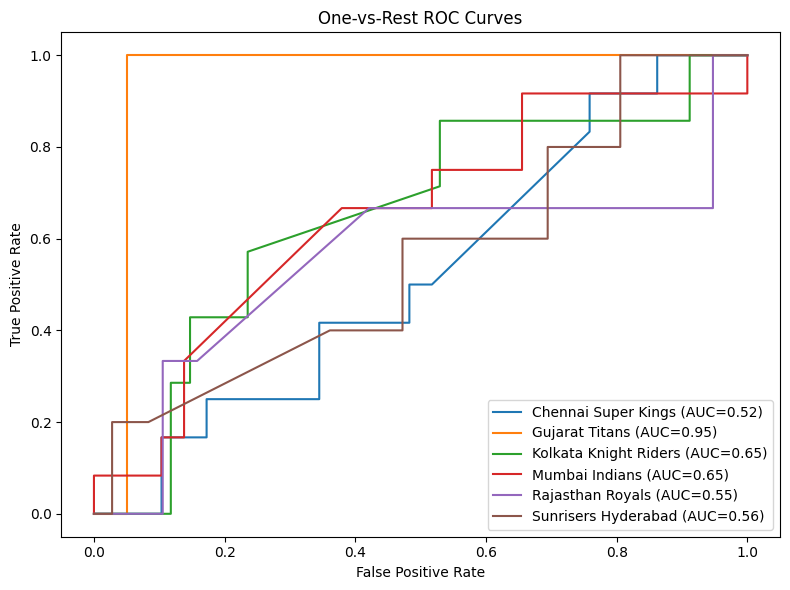

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    classification_report,
    roc_auc_score,
    roc_curve
)



# Rename the match-side season to a unified 'season'
# (yours may be season_mat or season_match)
if 'season_mat' in final_df.columns:
    final_df = final_df.rename(columns={'season_mat':'season'})
elif 'season_match' in final_df.columns:
    final_df = final_df.rename(columns={'season_match':'season'})
else:
    # if your delivery side had the right one:
    final_df = final_df.rename(columns={'season_del':'season'})

# Extract one row per match to identify each season’s final
matches_meta = (
    final_df[['match_id','season','date','winner']]
    .drop_duplicates(subset='match_id')
)
matches_meta['date'] = pd.to_datetime(matches_meta['date'])
finals = (
    matches_meta
    .sort_values(['season','date'], ascending=[True,True])
    .groupby('season', sort=False)
    .tail(1)[['season','winner']]
    .rename(columns={'winner':'champion'})
)

# Feature engineering per team-season
dismissal_kinds = ['bowled','caught','lbw','stumped','caught and bowled','hit wicket']
teams = final_df['batting_team'].unique()

records = []
for season in sorted(final_df['season'].unique()):
    df_s = final_df[final_df['season']==season]
    for team in teams:
        bat = df_s[df_s['batting_team']==team]
        total_runs = bat['batsman_runs'].sum()
        dismissals = bat['player_dismissed'].notna().sum() or 1
        bat_avg = total_runs / dismissals

        bowl = df_s[df_s['bowling_team']==team]
        conceded = bowl['total_runs'].sum()
        wkts = bowl['dismissal_kind'].isin(dismissal_kinds).sum() or 1
        bowl_avg = conceded / wkts

        top5_runs = bat.groupby('batter')['batsman_runs'].sum().nlargest(5).sum()
        top5_wkts = (
            bowl[bowl['dismissal_kind'].isin(dismissal_kinds)]
            .groupby('bowler').size().nlargest(5).sum()
        )

        records.append({
            'season': season,
            'team': team,
            'bat_avg': bat_avg,
            'bowl_avg': bowl_avg,
            'top5_runs_sum': top5_runs,
            'top5_wkts_sum': top5_wkts
        })

features_df = pd.DataFrame(records)

# Merge features with the champion label
data = features_df.merge(finals, on='season')

# Prepare feature matrix X and target y
X = data[['bat_avg','bowl_avg','top5_runs_sum','top5_wkts_sum']]
y = data['champion']

# Encode target and standardize features
le    = LabelEncoder(); y_enc = le.fit_transform(y)
scaler = StandardScaler(); X_std  = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'learning_rate': [0.2, 0.6],
    'subsample': [0.3, 0.6, 0.9]
}
xgb = XGBClassifier(
    max_depth=2,
    n_estimators=200,
    objective='multi:softprob',
    use_label_encoder=False,
    eval_metric='mlogloss'
)
grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    return_train_score=True
)
grid.fit(X_train, y_train)
print("XG Best params:", grid.best_params_)

# 11) Fit final XGB with best params
best = grid.best_params_
model = XGBClassifier(
    **best,
    max_depth=2,
    n_estimators=200,
    objective='multi:softprob',
    use_label_encoder=False,
    eval_metric='mlogloss'
)
model.fit(X_train, y_train)

#  Evaluate on train set
y_tr_pred = model.predict(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_tr_pred))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_tr_pred))
print("Train Classification Report:\n", classification_report(y_train, y_tr_pred))
y_tr_proba = model.predict_proba(X_train)
print("Train ROC AUC (ovr):", roc_auc_score(y_train, y_tr_proba, multi_class='ovr'))

# Evaluate on test set
y_te_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_te_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_te_pred))
print("Test Classification Report:\n", classification_report(y_test, y_te_pred))
y_te_proba = model.predict_proba(X_test)
print("Test ROC AUC (ovr):", roc_auc_score(y_test, y_te_proba, multi_class='ovr'))

# Plot ROC curves per class
plt.figure(figsize=(8,6))
for i, cls in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(y_test==i, y_te_proba[:,i])
    plt.plot(fpr, tpr, label=f'{cls} (AUC={roc_auc_score(y_test==i, y_te_proba[:,i]):.2f})')
plt.title('One-vs-Rest ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()



### Support Vector Machines (SVMs)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best SVM params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Train Accuracy: 0.3619631901840491
Train Confusion Matrix:
 [[26  0  0 22  0  0]
 [ 5  0  0  5  0  0]
 [15  0  0 14  0  0]
 [17  0  0 31  0  0]
 [ 2  0  0  7  0  0]
 [ 7  0  0 10  0  2]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.54      0.43        48
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        29
           3       0.35      0.65      0.45        48
           4       0.00      0.00      0.00         9
           5       1.00      0.11      0.19        19

    accuracy                           0.36       163
   macro avg       0.28      0.22      0.18       163
weighted avg       0.33      0.36      0.28       163

Train ROC AUC (ovr): 0.4721703454064734
Test Accuracy: 0.34146341463414637
Test Confusion Matrix:
 [[5 0 0 7 0 0]
 [1

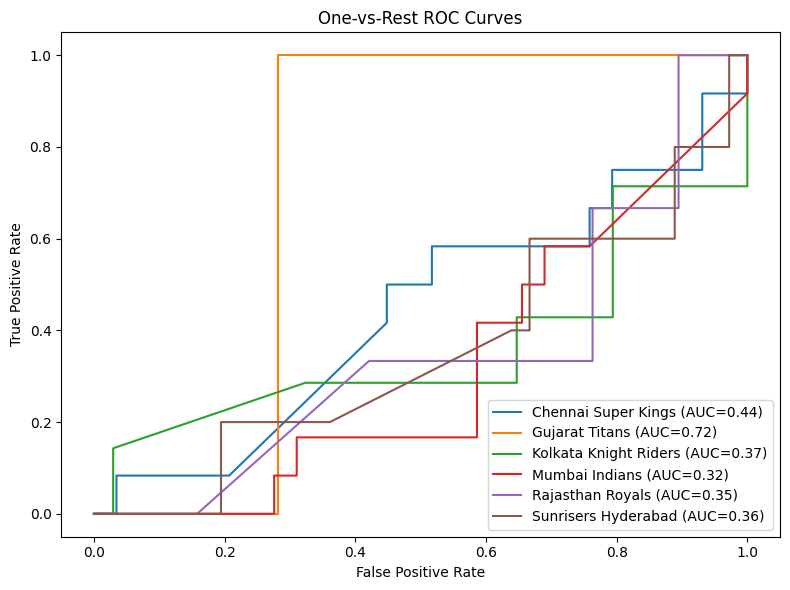

In [ ]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    classification_report,
    roc_auc_score,
    roc_curve
)


# Rename season column from matches side to 'season'
if 'season_mat' in final_df.columns:
    final_df = final_df.rename(columns={'season_mat':'season'})
elif 'season_match' in final_df.columns:
    final_df = final_df.rename(columns={'season_match':'season'})
else:
    final_df = final_df.rename(columns={'season_del':'season'})

# Identify champions by taking last match per season
matches_meta = (
    final_df[['match_id','season','date','winner']]
    .drop_duplicates('match_id')
)
matches_meta['date'] = pd.to_datetime(matches_meta['date'])
finals = (
    matches_meta
    .sort_values(['season','date'], ascending=[True,True])
    .groupby('season', sort=False)
    .tail(1)[['season','winner']]
    .rename(columns={'winner':'champion'})
)

# Feature engineering per team–season
dismissal_kinds = ['bowled','caught','lbw','stumped','caught and bowled','hit wicket']
teams = final_df['batting_team'].unique()

records = []
for season in sorted(final_df['season'].unique()):
    df_s = final_df[final_df['season']==season]
    for team in teams:
        bat = df_s[df_s['batting_team']==team]
        total_runs  = bat['batsman_runs'].sum()
        dismissals  = bat['player_dismissed'].notna().sum() or 1
        bat_avg     = total_runs / dismissals

        bowl = df_s[df_s['bowling_team']==team]
        conceded    = bowl['total_runs'].sum()
        wkts        = bowl['dismissal_kind'].isin(dismissal_kinds).sum() or 1
        bowl_avg    = conceded / wkts

        top5_runs   = bat.groupby('batter')['batsman_runs'].sum().nlargest(5).sum()
        top5_wkts   = (
            bowl[bowl['dismissal_kind'].isin(dismissal_kinds)]
            .groupby('bowler').size()
            .nlargest(5).sum()
        )

        records.append({
            'season': season,
            'team': team,
            'bat_avg': bat_avg,
            'bowl_avg': bowl_avg,
            'top5_runs_sum': top5_runs,
            'top5_wkts_sum': top5_wkts
        })

features_df = pd.DataFrame(records)

# Merge with champion labels
data = features_df.merge(finals, on='season')

# Prepare X and y
X = data[['bat_avg','bowl_avg','top5_runs_sum','top5_wkts_sum']]
y = data['champion']

#  Encode and scale
le      = LabelEncoder()
y_enc   = le.fit_transform(y)
scaler  = StandardScaler()
X_std   = scaler.fit_transform(X)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

# Set up SVM & grid search
svc = SVC(probability=True, random_state=42)

param_grid = {
    'C':    [0.1, 1, 10],
    'gamma':['scale', 'auto'],
    'kernel':['rbf','linear']
}

grid = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    return_train_score=True
)
grid.fit(X_train, y_train)

print("Best SVM params:", grid.best_params_)

# Train final SVM
best_svm = grid.best_estimator_
best_svm.fit(X_train, y_train)

# Evaluate on training set
y_tr_pred  = best_svm.predict(X_train)
y_tr_proba = best_svm.predict_proba(X_train)

print("Train Accuracy:", accuracy_score(y_train, y_tr_pred))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_tr_pred))
print("Train Classification Report:\n", classification_report(y_train, y_tr_pred))
print("Train ROC AUC (ovr):", roc_auc_score(y_train, y_tr_proba, multi_class='ovr'))

# Evaluate on test set
y_te_pred  = best_svm.predict(X_test)
y_te_proba = best_svm.predict_proba(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_te_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_te_pred))
print("Test Classification Report:\n", classification_report(y_test, y_te_pred))
print("Test ROC AUC (ovr):", roc_auc_score(y_test, y_te_proba, multi_class='ovr'))

# Plot ROC curves per class
plt.figure(figsize=(8,6))
for i, cls in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(y_test==i, y_te_proba[:,i])
    plt.plot(fpr, tpr, label=f'{cls} (AUC={roc_auc_score(y_test==i, y_te_proba[:,i]):.2f})')
plt.title('One-vs-Rest ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


### Decision Tree Classifier

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Decision Tree params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Train Accuracy: 0.4049079754601227
Train Confusion Matrix:
 [[14  0  5 29  0  0]
 [ 4  1  0  5  0  0]
 [10  0  8 11  0  0]
 [ 4  0  2 42  0  0]
 [ 1  0  0  8  0  0]
 [ 3  0  0 15  0  1]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.29      0.33        48
           1       1.00      0.10      0.18        10
           2       0.53      0.28      0.36        29
           3       0.38      0.88      0.53        48
           4       0.00      0.00      0.00         9
           5       1.00      0.05      0.10        19

    accuracy                           0.40       163
   macro avg       0.55      0.27      0.25       163
weighted avg       0.50      0.40      0.34       163

Train ROC AUC (ovr): 0.6872724480913993
Test Accuracy: 0.2926829268292683
Test Confusion M

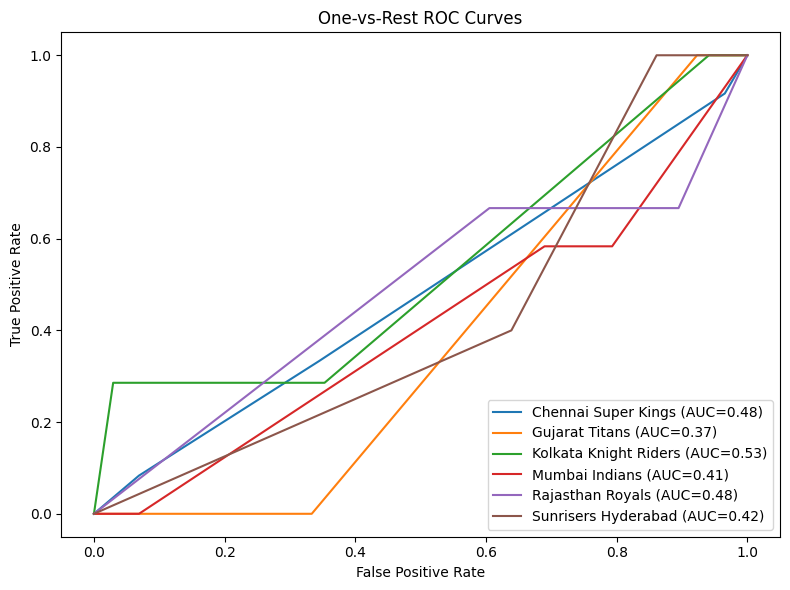

In [ ]:
matches_meta = (
    final_df[['match_id','season','date','winner']]
    .drop_duplicates('match_id')
)
matches_meta['date'] = pd.to_datetime(matches_meta['date'])
finals = (
    matches_meta
    .sort_values(['season','date'])
    .groupby('season', sort=False)
    .tail(1)[['season','winner']]
    .rename(columns={'winner':'champion'})
)

# Feature engineering per team–season
dismissal_kinds = [
    'bowled','caught','lbw','stumped',
    'caught and bowled','hit wicket'
]
teams = final_df['batting_team'].unique()

records = []
for season in sorted(final_df['season'].unique()):
    df_s = final_df[final_df['season']==season]
    for team in teams:
        bat = df_s[df_s['batting_team']==team]
        total_runs  = bat['batsman_runs'].sum()
        dismissals  = bat['player_dismissed'].notna().sum() or 1
        bat_avg     = total_runs / dismissals

        bowl = df_s[df_s['bowling_team']==team]
        conceded    = bowl['total_runs'].sum()
        wkts        = bowl['dismissal_kind'].isin(dismissal_kinds).sum() or 1
        bowl_avg    = conceded / wkts

        top5_runs = bat.groupby('batter')['batsman_runs']\
                       .sum().nlargest(5).sum()
        top5_wkts = (
            bowl[bowl['dismissal_kind'].isin(dismissal_kinds)]
            .groupby('bowler').size()
            .nlargest(5).sum()
        )

        records.append({
            'season': season,
            'team': team,
            'bat_avg': bat_avg,
            'bowl_avg': bowl_avg,
            'top5_runs_sum': top5_runs,
            'top5_wkts_sum': top5_wkts
        })

features_df = pd.DataFrame(records)

# Merge with champion labels
data = features_df.merge(finals, on='season')

#  Prepare X and y
X = data[['bat_avg','bowl_avg','top5_runs_sum','top5_wkts_sum']]
y = data['champion']

#  Encode target
le = LabelEncoder()
y_enc = le.fit_transform(y)

#(Optional) scale features for consistency
scaler = StandardScaler()
X_std  = scaler.fit_transform(X)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

# Set up Decision Tree and GridSearchCV
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    return_train_score=True
)
grid.fit(X_train, y_train)
print("Best Decision Tree params:", grid.best_params_)

# Train final model
best_dt = grid.best_estimator_
best_dt.fit(X_train, y_train)

# Evaluate on training set
y_tr_pred  = best_dt.predict(X_train)
y_tr_proba = best_dt.predict_proba(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_tr_pred))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_tr_pred))
print("Train Classification Report:\n", classification_report(y_train, y_tr_pred))
print("Train ROC AUC (ovr):", roc_auc_score(y_train, y_tr_proba, multi_class='ovr'))

# Evaluate on test set
y_te_pred  = best_dt.predict(X_test)
y_te_proba = best_dt.predict_proba(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_te_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_te_pred))
print("Test Classification Report:\n", classification_report(y_test, y_te_pred))
print("Test ROC AUC (ovr):", roc_auc_score(y_test, y_te_proba, multi_class='ovr'))

# Plot ROC curves (one‐vs‐rest)
plt.figure(figsize=(8,6))
for i, cls in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(y_test==i, y_te_proba[:,i])
    auc = roc_auc_score(y_test==i, y_te_proba[:,i])
    plt.plot(fpr, tpr, label=f'{cls} (AUC={auc:.2f})')
plt.title('One-vs-Rest ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()




### Random Forest Classifier

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best RF params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Train Accuracy: 0.656441717791411
Train Confusion Matrix:
 [[35  0  0 13  0  0]
 [ 4  2  0  4  0  0]
 [ 5  0 16  8  0  0]
 [ 2  0  0 46  0  0]
 [ 3  0  0  5  1  0]
 [ 2  0  1  9  0  7]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.73      0.71        48
           1       1.00      0.20      0.33        10
           2       0.94      0.55      0.70        29
           3       0.54      0.96      0.69        48
           4       1.00      0.11      0.20         9
           5       1.00      0.37      0.54        19

    accuracy                           0.66       163
   macro avg       0.86      0.49      0.53       163
weighted avg       0.76      0.66      0.63       163

Train ROC AUC (ovr): 0.9045284011795379
Test Accuracy: 0.3902439024390244
Test 

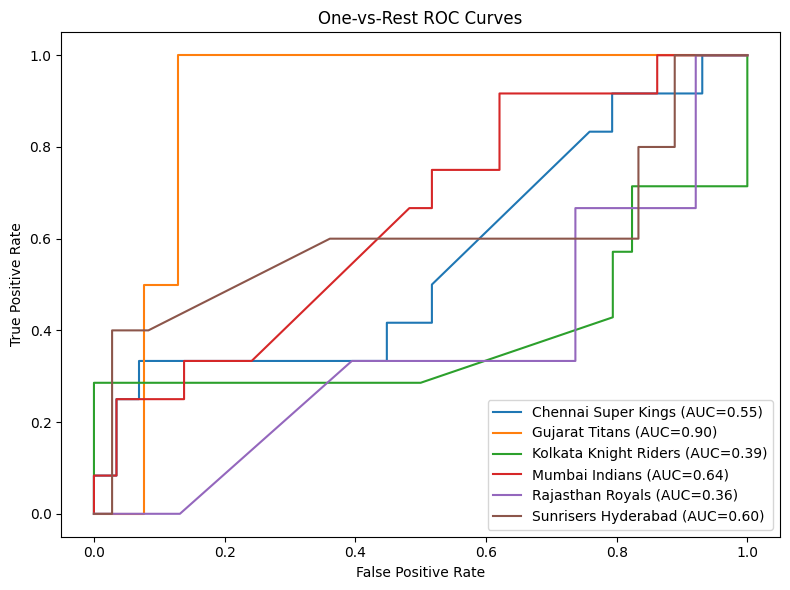

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    classification_report,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt


# Identify champions by taking last match per season
matches_meta = (
    final_df[['match_id','season','date','winner']]
    .drop_duplicates('match_id')
)
matches_meta['date'] = pd.to_datetime(matches_meta['date'])
finals = (
    matches_meta
    .sort_values(['season','date'])
    .groupby('season', sort=False)
    .tail(1)[['season','winner']]
    .rename(columns={'winner':'champion'})
)

# Feature engineering per team–season
dismissal_kinds = ['bowled','caught','lbw','stumped','caught and bowled','hit wicket']
teams = final_df['batting_team'].unique()

records = []
for season in sorted(final_df['season'].unique()):
    df_s = final_df[final_df['season']==season]
    for team in teams:
        bat = df_s[df_s['batting_team']==team]
        total_runs  = bat['batsman_runs'].sum()
        dismissals  = bat['player_dismissed'].notna().sum() or 1
        bat_avg     = total_runs / dismissals

        bowl = df_s[df_s['bowling_team']==team]
        conceded    = bowl['total_runs'].sum()
        wkts        = bowl['dismissal_kind'].isin(dismissal_kinds).sum() or 1
        bowl_avg    = conceded / wkts

        top5_runs = bat.groupby('batter')['batsman_runs'].sum().nlargest(5).sum()
        top5_wkts = (
            bowl[bowl['dismissal_kind'].isin(dismissal_kinds)]
            .groupby('bowler').size()
            .nlargest(5).sum()
        )

        records.append({
            'season': season,
            'team': team,
            'bat_avg': bat_avg,
            'bowl_avg': bowl_avg,
            'top5_runs_sum': top5_runs,
            'top5_wkts_sum': top5_wkts
        })

features_df = pd.DataFrame(records)

# Merge with champion labels
data = features_df.merge(finals, on='season')

# Prepare X and y
X = data[['bat_avg','bowl_avg','top5_runs_sum','top5_wkts_sum']]
y = data['champion']

# Encode target & scale features
le     = LabelEncoder()
y_enc  = le.fit_transform(y)
scaler = StandardScaler()
X_std  = scaler.fit_transform(X)

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    return_train_score=True
)
grid.fit(X_train, y_train)
print("Best RF params:", grid.best_params_)

# Train final model
best_rf = grid.best_estimator_
best_rf.fit(X_train, y_train)

# Evaluate on training set
y_tr_pred  = best_rf.predict(X_train)
y_tr_proba = best_rf.predict_proba(X_train)
print("Train Accuracy:", accuracy_score(y_train, y_tr_pred))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_tr_pred))
print("Train Classification Report:\n", classification_report(y_train, y_tr_pred))
print("Train ROC AUC (ovr):", roc_auc_score(y_train, y_tr_proba, multi_class='ovr'))

# Evaluate on test set
y_te_pred  = best_rf.predict(X_test)
y_te_proba = best_rf.predict_proba(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_te_pred))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_te_pred))
print("Test Classification Report:\n", classification_report(y_test, y_te_pred))
print("Test ROC AUC (ovr):", roc_auc_score(y_test, y_te_proba, multi_class='ovr'))

# Plot ROC curves (one-vs-rest)
plt.figure(figsize=(8,6))
for i, cls in enumerate(le.classes_):
    fpr, tpr, _ = roc_curve(y_test == i, y_te_proba[:, i])
    auc = roc_auc_score(y_test == i, y_te_proba[:, i])
    plt.plot(fpr, tpr, label=f'{cls} (AUC={auc:.2f})')
plt.title('One-vs-Rest ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


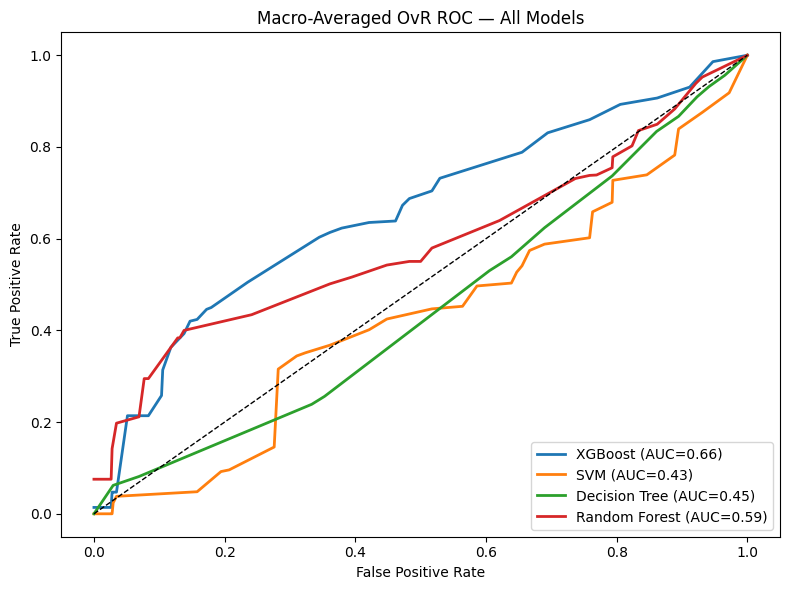

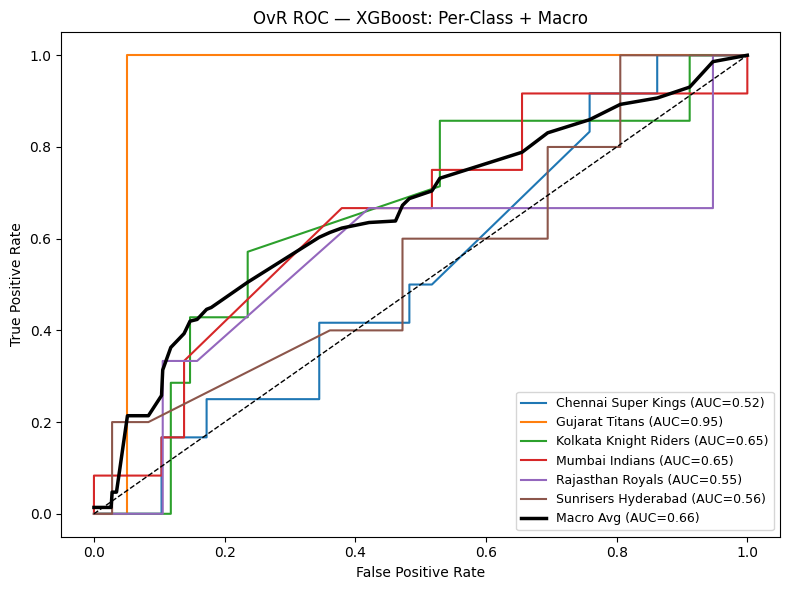

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# compute macro-averaged ROC (OvR) from per-class scores
def macro_roc(y_true, y_score, n_classes):
    fprs, tprs, aucs = [], [], []
    for i in range(n_classes):
        y_true_i = (y_true == i).astype(int)

        if y_true_i.sum() == 0:
            continue
        fpr, tpr, _ = roc_curve(y_true_i, y_score[:, i])
        fprs.append(fpr)
        tprs.append(tpr)
        aucs.append(auc(fpr, tpr))

    # Union of all FPR points
    all_fpr = np.unique(np.concatenate([f for f in fprs]))
    mean_tpr = np.zeros_like(all_fpr)
    for fpr, tpr in zip(fprs, tprs):
        mean_tpr += np.interp(all_fpr, fpr, tpr)
    mean_tpr /= len(tprs)
    macro_auc = auc(all_fpr, mean_tpr)
    return all_fpr, mean_tpr, macro_auc

# Collect your fitted models
models = {
    'XGBoost': model,
    'SVM': best_svm,
    'Decision Tree': best_dt,
    'Random Forest': best_rf
}

n_classes = len(le.classes_)

# Overlay ONE macro-averaged ROC curve per model ====
plt.figure(figsize=(8,6))
for name, clf in models.items():
    y_score = clf.predict_proba(X_test)
    fpr_m, tpr_m, auc_m = macro_roc(y_test, y_score, n_classes)
    plt.plot(fpr_m, tpr_m, lw=2, label=f'{name} (AUC={auc_m:.2f})')

plt.plot([0,1], [0,1], 'k--', lw=1)
plt.title('Macro-Averaged OvR ROC — All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


model_name_to_expand = 'XGBoost'
clf = models[model_name_to_expand]
y_score = clf.predict_proba(X_test)

plt.figure(figsize=(8,6))
# per-class curves
for i, cls_name in enumerate(le.classes_):
    mask_pos = (y_test == i)
    if mask_pos.sum() == 0:
        continue
    fpr_i, tpr_i, _ = roc_curve(mask_pos.astype(int), y_score[:, i])
    auc_i = auc(fpr_i, tpr_i)
    plt.plot(fpr_i, tpr_i, lw=1.5, label=f'{cls_name} (AUC={auc_i:.2f})')

# macro curve
fpr_m, tpr_m, auc_m = macro_roc(y_test, y_score, n_classes)
plt.plot(fpr_m, tpr_m, color='black', lw=2.5, label=f'Macro Avg (AUC={auc_m:.2f})')

plt.plot([0,1], [0,1], 'k--', lw=1)
plt.title(f'OvR ROC — {model_name_to_expand}: Per-Class + Macro')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize=9)
plt.tight_layout()
plt.show()


In [98]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_fscore_support


models = {
    'XGBoost': model,
    'SVM': best_svm,
    'Decision Tree': best_dt,
    'Random Forest': best_rf
}

def build_res_df(models, X_train, y_train, X_test, y_test):
    rows = []
    for name, clf in models.items():
        # fit if not already fitted
        if not hasattr(clf, "classes_"):
            clf.fit(X_train, y_train)

        y_pred  = clf.predict(X_test)
        y_proba = clf.predict_proba(X_test)

        acc = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_proba, multi_class='ovr')

        p_macro, r_macro, f1_macro, _ = precision_recall_fscore_support(
            y_test, y_pred, average='macro', zero_division=0
        )

        rows.append({
            'Model': name,
            'Accuracy': acc,
            'ROC AUC (OvR)': auc,
            'Precision (macro)': p_macro,
            'Recall (macro)': r_macro,
            'F1 (macro)': f1_macro
        })

    return pd.DataFrame(rows).set_index('Model')

res_df = build_res_df(models, X_train, y_train, X_test, y_test)
print(res_df.round(3))


               Accuracy  ROC AUC (OvR)  Precision (macro)  Recall (macro)  \
Model                                                                       
XGBoost           0.317          0.646              0.227           0.210   
SVM               0.341          0.424              0.112           0.194   
Decision Tree     0.293          0.449              0.200           0.187   
Random Forest     0.390          0.574              0.366           0.262   

               F1 (macro)  
Model                      
XGBoost             0.198  
SVM                 0.141  
Decision Tree       0.170  
Random Forest       0.262  


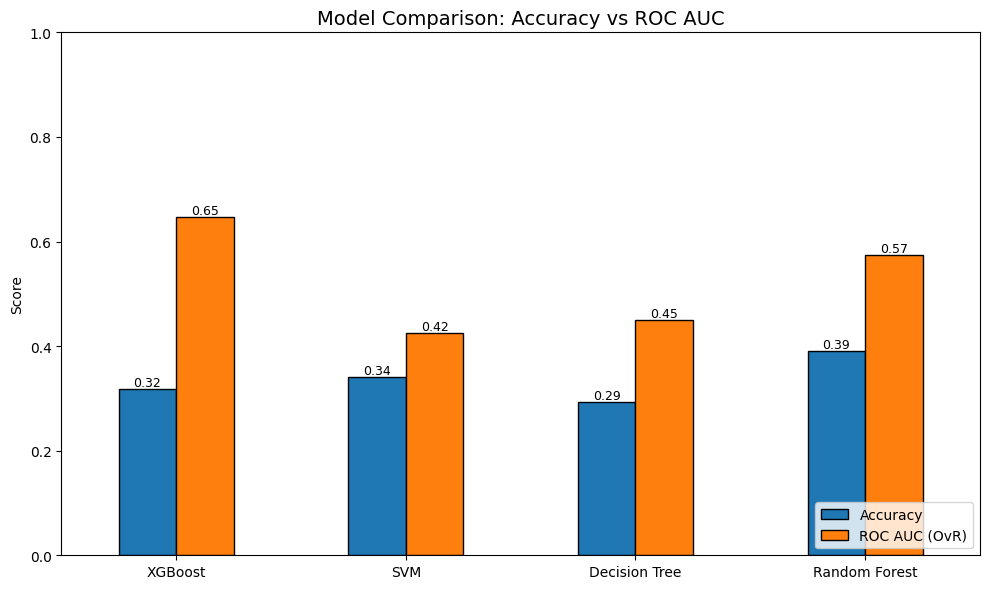

In [97]:
import matplotlib.pyplot as plt

ax = res_df[['Accuracy','ROC AUC (OvR)']].plot(
    kind='bar', figsize=(10,6), edgecolor='black',
    color=['#1f77b4','#ff7f0e']
)
for p in ax.patches:
    h = p.get_height()
    ax.annotate(f"{h:.2f}", (p.get_x()+p.get_width()/2, h),
                ha='center', va='bottom', fontsize=9)
ax.set_title('Model Comparison: Accuracy vs ROC AUC', fontsize=14)
ax.set_ylabel('Score'); ax.set_xlabel('')
ax.set_ylim(0, 1); plt.xticks(rotation=0)
ax.legend(loc='lower right', fontsize=10)
plt.tight_layout(); plt.show()


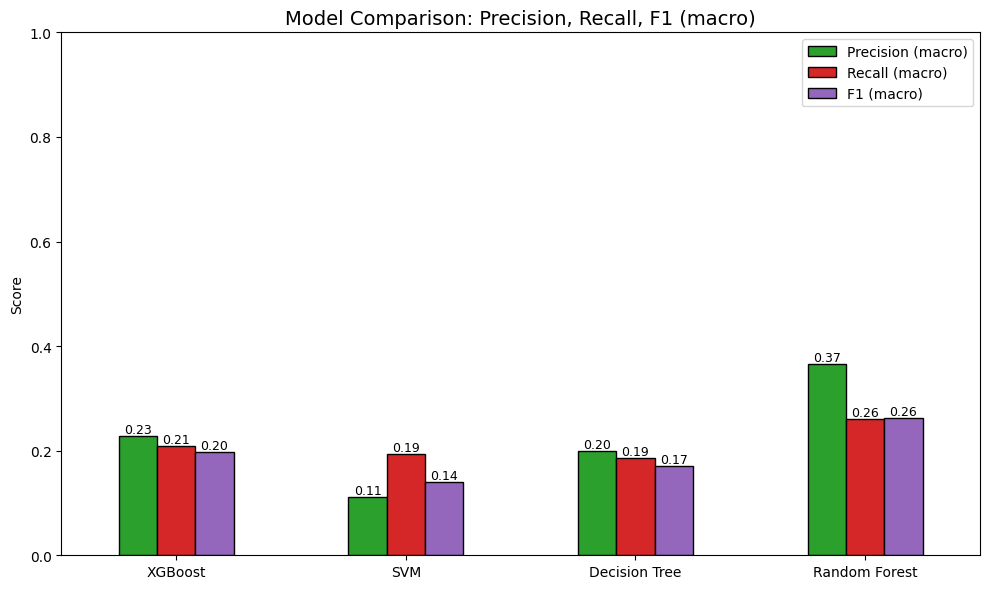

In [100]:
ax = res_df[['Precision (macro)','Recall (macro)','F1 (macro)']].plot(
    kind='bar', figsize=(10,6), edgecolor='black',
    color=['#2ca02c', '#d62728', '#9467bd']
)
for p in ax.patches:
    h = p.get_height()
    ax.annotate(f"{h:.2f}", (p.get_x()+p.get_width()/2, h),
                ha='center', va='bottom', fontsize=9)
ax.set_title('Model Comparison: Precision, Recall, F1 (macro)', fontsize=14)
ax.set_ylabel('Score'); ax.set_xlabel('')
ax.set_ylim(0, 1); plt.xticks(rotation=0)
ax.legend(loc='upper right', fontsize=10)
plt.tight_layout(); plt.show()


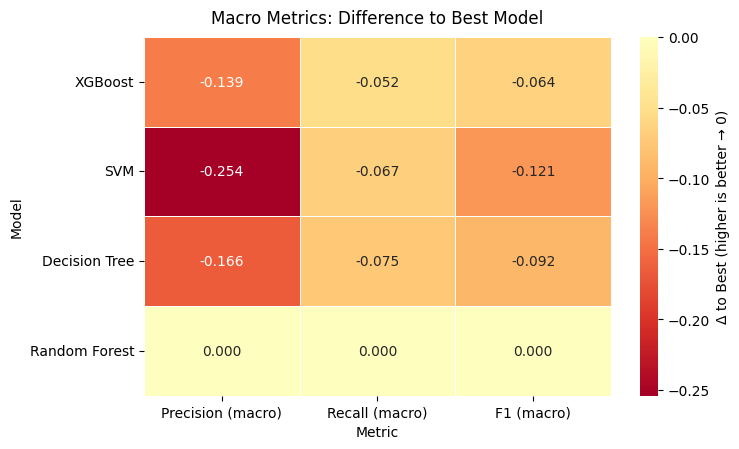

In [101]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

macro_df = res_df[['Precision (macro)','Recall (macro)','F1 (macro)']].copy()
delta_to_best = macro_df.sub(macro_df.max(axis=0), axis=1)  # best = 0

plt.figure(figsize=(7.5, 0.9*len(delta_to_best)+1))
sns.heatmap(
    delta_to_best.round(3),
    annot=True, fmt=".3f",
    cmap='RdYlGn', center=0,
    vmin=delta_to_best.min().min(), vmax=0,
    linewidths=0.5, linecolor='white',
    cbar_kws={'label': 'Δ to Best (higher is better → 0)'}
)
plt.title('Macro Metrics: Difference to Best Model', pad=10)
plt.ylabel('Model'); plt.xlabel('Metric')
plt.tight_layout(); plt.show()


Predicting Next Season Champion

In [104]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Identify champions by taking the last match of each season
matches_meta = (
    final_df[['match_id','season','date','winner']]
    .drop_duplicates(subset='match_id')
)
matches_meta['date'] = pd.to_datetime(matches_meta['date'])
finals = (
    matches_meta
    .sort_values(['season','date'])
    .groupby('season', sort=False)
    .tail(1)[['season','winner']]
    .rename(columns={'winner':'champion'})
)

# Feature engineering per team-season
dismissal_kinds = ['bowled','caught','lbw','stumped','caught and bowled','hit wicket']
teams = final_df['batting_team'].unique()

records = []
for season in sorted(final_df['season'].unique()):
    df_s = final_df[final_df['season']==season]
    for team in teams:
        # Batting metrics
        bat = df_s[df_s['batting_team']==team]
        total_runs  = bat['batsman_runs'].sum()
        dismissals  = bat['player_dismissed'].notna().sum() or 1
        bat_avg     = total_runs / dismissals

        # Bowling metrics
        bowl = df_s[df_s['bowling_team']==team]
        conceded    = bowl['total_runs'].sum()
        wkts        = bowl['dismissal_kind'].isin(dismissal_kinds).sum() or 1
        bowl_avg    = conceded / wkts

        # Top-5 contributors
        top5_runs = bat.groupby('batter')['batsman_runs'].sum().nlargest(5).sum()
        top5_wkts = (
            bowl[bowl['dismissal_kind'].isin(dismissal_kinds)]
            .groupby('bowler').size().nlargest(5).sum()
        )

        records.append({
            'season': season,
            'team': team,
            'bat_avg': bat_avg,
            'bowl_avg': bowl_avg,
            'top5_runs_sum': top5_runs,
            'top5_wkts_sum': top5_wkts
        })

features_df = pd.DataFrame(records)

# Merge features with champion labels
data = features_df.merge(finals, on='season')

# Prepare X and y
X = data[['bat_avg','bowl_avg','top5_runs_sum','top5_wkts_sum']]
y = data['champion']

# Encode target and scale features
le     = LabelEncoder()
y_enc  = le.fit_transform(y)
scaler = StandardScaler()
X_std  = scaler.fit_transform(X)

# Train final XGBoost on all historical data
model = XGBClassifier(
    max_depth=2,
    n_estimators=200,
    learning_rate=0.2,
    subsample=0.3,
    objective='multi:softprob',
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
model.fit(X_std, y_enc)

# Build next-season feature matrix (latest season only)
latest = final_df['season'].max()
next_df = final_df[final_df['season']==latest]

upcoming = []
for team in teams:
    bat = next_df[next_df['batting_team']==team]
    total_runs  = bat['batsman_runs'].sum()
    dismissals  = bat['player_dismissed'].notna().sum() or 1
    bat_avg     = total_runs / dismissals

    bowl = next_df[next_df['bowling_team']==team]
    conceded    = bowl['total_runs'].sum()
    wkts        = bowl['dismissal_kind'].isin(dismissal_kinds).sum() or 1
    bowl_avg    = conceded / wkts

    top5_runs = bat.groupby('batter')['batsman_runs'].sum().nlargest(5).sum()
    top5_wkts = (
        bowl[bowl['dismissal_kind'].isin(dismissal_kinds)]
        .groupby('bowler').size().nlargest(5).sum()
    )

    upcoming.append({
        'bat_avg': bat_avg,
        'bowl_avg': bowl_avg,
        'top5_runs_sum': top5_runs,
        'top5_wkts_sum': top5_wkts
    })

X_next = pd.DataFrame(upcoming, index=teams)
X_next_std = scaler.transform(X_next)

# Predict next-season champion
proba = model.predict_proba(X_next_std)
idx  = np.argmax(proba[:, :], axis=0)[0]  # highest probability overall
pred_team = le.inverse_transform([idx])[0]
pred_prob = proba[idx, idx] if False else proba[np.arange(len(teams)), idx].max()

print(f"Predicted champion for Season {latest+1}: {pred_team}")


Predicted champion for Season 2025: Kolkata Knight Riders


Predicting Furtue Player

In [105]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Feature engineering per player–season

# Batsman features
df_bat = (
    final_df
    .groupby(['batter','season'], as_index=False)
    .agg(
        total_runs  = ('batsman_runs','sum'),
        balls_faced = ('ball','count'),
        dismissals  = ('player_dismissed','count')
    )
)
df_bat['dismissals'].replace(0, np.nan, inplace=True)
df_bat['bat_avg'] = df_bat['total_runs'] / df_bat['dismissals']
df_bat['sr']      = 100 * df_bat['total_runs'] / df_bat['balls_faced']
df_bat.dropna(subset=['bat_avg','sr'], inplace=True)

# Bowler features
wicket_kinds = ['bowled','caught','lbw','stumped','caught and bowled','hit wicket']
df_bowl = (
    final_df[final_df['dismissal_kind'].isin(wicket_kinds)]
    .groupby(['bowler','season'], as_index=False)
    .agg(
        wickets       = ('dismissal_kind','count'),
        runs_conceded = ('total_runs','sum'),
        balls_bowled  = ('ball','count')
    )
)
df_bowl['overs'] = df_bowl['balls_bowled'] / 6
df_bowl['econ']  = df_bowl['runs_conceded'] / df_bowl['overs']

# Fielder features (catches)
df_field = (
    final_df[final_df['dismissal_kind']=='caught']
    .dropna(subset=['fielder'])
    .groupby(['fielder','season'], as_index=False)
    .agg(catches=('dismissal_kind','count'))
)

# Helper to build t→t+1 training sets
def make_reg_train(df, player_col, feature_cols, target_col):
    tmp = df.rename(columns={player_col:'player'}) \
            .sort_values(['player','season'])
    tmp['target'] = tmp.groupby('player')[target_col].shift(-1)
    tmp.dropna(subset=feature_cols + ['target'], inplace=True)
    X = tmp[feature_cols]
    y = tmp['target']
    return X, y

# Build training sets for each role
X_bat, y_bat   = make_reg_train(df_bat,   'batter', ['total_runs','bat_avg','sr'], 'total_runs')
X_bowl, y_bowl = make_reg_train(df_bowl,  'bowler',  ['wickets','econ'],          'wickets')
X_fld, y_fld   = make_reg_train(df_field, 'fielder', ['catches'],                'catches')

# Create separate imputers per role
imp_bat  = SimpleImputer(strategy='mean'); Xb_imp  = imp_bat.fit_transform(X_bat)
imp_bowl = SimpleImputer(strategy='mean'); Xl_imp  = imp_bowl.fit_transform(X_bowl)
imp_fld  = SimpleImputer(strategy='mean'); Xf_imp  = imp_fld.fit_transform(X_fld)

# Split into train/test
Xb_tr, Xb_te, yb_tr, yb_te = train_test_split(Xb_imp, y_bat, test_size=0.2, random_state=42)
Xl_tr, Xl_te, yl_tr, yl_te = train_test_split(Xl_imp, y_bowl, test_size=0.2, random_state=42)
Xf_tr, Xf_te, yf_tr, yf_te = train_test_split(Xf_imp, y_fld, test_size=0.2, random_state=42)

# Train XGB regressors with chosen hyperparameters
params = {
    'learning_rate': 0.2,
    'subsample':     0.3,
    'max_depth':     3,
    'n_estimators': 200,
    'random_state': 42
}
model_bat  = XGBRegressor(**params).fit(Xb_tr, yb_tr)
model_bowl = XGBRegressor(**params).fit(Xl_tr, yl_tr)
model_fld  = XGBRegressor(**params).fit(Xf_tr, yf_tr)

# Optional: print train RMSE
print("Batsman RMSE:",  np.sqrt(mean_squared_error(yb_tr, model_bat.predict(Xb_tr))))
print("Bowler RMSE:  ",  np.sqrt(mean_squared_error(yl_tr, model_bowl.predict(Xl_tr))))
print("Fielder RMSE: ",  np.sqrt(mean_squared_error(yf_tr, model_fld.predict(Xf_tr))))

# Prepare next-season feature sets
latest = final_df['season'].max()
bat_new  = df_bat[df_bat['season']==latest][['total_runs','bat_avg','sr']].reset_index(drop=True)
bowl_new = df_bowl[df_bowl['season']==latest][['wickets','econ']].reset_index(drop=True)
fld_new  = df_field[df_field['season']==latest][['catches']].reset_index(drop=True)

bat_imp_next  = imp_bat.transform(bat_new)
bowl_imp_next = imp_bowl.transform(bowl_new)
fld_imp_next  = imp_fld.transform(fld_new)

# Player lists for next season
batsmen =  df_bat[df_bat['season']==latest]['batter'].tolist()
bowlers =  df_bowl[df_bowl['season']==latest]['bowler'].tolist()
fielders= df_field[df_field['season']==latest]['fielder'].tolist()

# Predict next-season performance
pred_runs    = model_bat.predict(bat_imp_next)
pred_wkts    = model_bowl.predict(bowl_imp_next)
pred_catches = model_fld.predict(fld_imp_next)

# Select top performers
df_pred_bat   = pd.DataFrame({'batter': batsmen,    'pred_runs':    pred_runs})
df_pred_bowl  = pd.DataFrame({'bowler':  bowlers,    'pred_wickets': pred_wkts})
df_pred_field = pd.DataFrame({'fielder': fielders,   'pred_catches': pred_catches})

top4_batsmen  = df_pred_bat.nlargest(5, 'pred_runs')
top5_bowlers  = df_pred_bowl.nlargest(5, 'pred_wickets')
top3_fielders = df_pred_field.nlargest(3, 'pred_catches')

# Output your predicted XI
print(" Predicted Next-Season Squad:")
print("\n Top 5 Batsmen:")
print(top4_batsmen.to_string(index=False))
print("\n Top 5 Bowlers:")
print(top5_bowlers.to_string(index=False))
print("\n Top 3 Catchers:")
print(top3_fielders.to_string(index=False))


Batsman RMSE: 97.4281368637803
Bowler RMSE:   5.459701093807129
Fielder RMSE:  2.748546018057086
 Predicted Next-Season Squad:

 Top 5 Batsmen:
     batter  pred_runs
   KL Rahul 581.994446
     S Dube 413.816895
    TM Head 411.847717
    RR Pant 389.867798
YBK Jaiswal 385.797119

 Top 5 Bowlers:
        bowler  pred_wickets
      HV Patel     18.328312
     YS Chahal     14.004087
    AD Russell     13.870964
Arshdeep Singh     13.870964
    Avesh Khan     13.870964

 Top 3 Catchers:
    fielder  pred_catches
   KL Rahul      8.508060
   AR Patel      7.219531
Dhruv Jurel      7.219531


In [109]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# assume final_df is already loaded and cleaned
df = final_df.copy()
df['season'] = df['season'].astype(int)

# Batting aggregation
bat = (
    df.groupby(['batter','season'], as_index=False)
      .agg(
        runs       = ('batsman_runs','sum'),
        balls      = ('ball','count'),
        dismissals = ('player_dismissed', lambda x: x.notna().sum())
      )
)
bat['dismissals'].replace(0, np.nan, inplace=True)
bat['bat_avg'] = bat['runs'] / bat['dismissals']
bat['sr']      = 100 * bat['runs'] / bat['balls']

# Bowling aggregation
wk = ['bowled','caught','lbw','stumped','caught and bowled','hit wicket']
df['runs_conceded'] = df['total_runs'] - df['batsman_runs']
bowl = (
    df[df['dismissal_kind'].isin(wk)]
      .groupby(['bowler','season'], as_index=False)
      .agg(
        wickets       = ('dismissal_kind','count'),
        runs_conceded = ('runs_conceded','sum'),
        balls_bowled  = ('ball','count')
      )
)
bowl['overs']    = bowl['balls_bowled'] / 6
bowl['econ']     = bowl['runs_conceded'] / bowl['overs']
bowl['bowl_avg'] = bowl['runs_conceded'] / bowl['wickets'].replace(0, np.nan)

# Fielding (catches) aggregation
fld = (
    df[df['dismissal_kind']=='caught']
      .dropna(subset=['fielder'])
      .groupby(['fielder','season'], as_index=False)
      .agg(catches=('dismissal_kind','count'))
)

# Merge into player‐season table
pt = pd.merge(
    bat.rename(columns={'batter':'player'}),
    bowl.rename(columns={'bowler':'player'}),
    on=['player','season'], how='outer'
).fillna(0)

pt = pd.merge(
    pt,
    fld.rename(columns={'fielder':'player'}),
    on=['player','season'], how='outer'
).fillna(0)

# Build combined metric (normalized per season)
for col in ['runs','wickets','catches']:
    pt[f'n{col}'] = pt.groupby('season')[col].transform(lambda g: g / g.max())

pt['combined'] = pt['nruns'] + pt['nwickets'] + pt['ncatches']

# Create t→t+1 training set
train = pt.sort_values(['player','season'])
train['target'] = train.groupby('player')['combined'].shift(-1)
train = train.dropna(subset=['target'])

# Define features (must exist in train)
features = ['runs','bat_avg','sr','wickets','econ','bowl_avg','catches']
X = train[features]
y = train['target']

# Impute & split
imp = SimpleImputer(strategy='mean')
X_imp = imp.fit_transform(X)
X_tr, X_te, y_tr, y_te = train_test_split(X_imp, y, test_size=0.2, random_state=42)

# Train XGBoost regressor
model = XGBRegressor(
    learning_rate=0.2,
    subsample=0.3,
    max_depth=3,
    n_estimators=200,
    random_state=42
)
model.fit(X_tr, y_tr)
print("Train RMSE:", np.sqrt(mean_squared_error(y_tr, model.predict(X_tr))))
print("Test  RMSE:", np.sqrt(mean_squared_error(y_te, model.predict(X_te))))

# Predict next season combined score
latest = pt['season'].max()
pt_new = pt[pt['season']==latest].reset_index(drop=True)
X_new  = imp.transform(pt_new[features])
pt_new['pred_score'] = model.predict(X_new)

# Pick top 11 by predicted combined score
top11 = pt_new.nlargest(20, 'pred_score')[[
    'player','runs','catches','pred_score'
]]
print("\nPredicted Top 20 Batsman Next Season:")
print(top11.to_string(index=False))


Train RMSE: 0.29638716325643305
Test  RMSE: 0.42377466729508845

Predicted Top 20 Batsman Next Season:
         player  runs  catches  pred_score
J Fraser-McGurk 330.0      5.0    1.951343
      H Klaasen 479.0      8.0    1.503825
      SP Narine 488.0      7.0    1.489178
     AD Russell 222.0      3.0    1.470267
        TM Head 567.0      0.0    1.452576
        PD Salt 435.0     12.0    1.395472
     PJ Cummins 136.0      7.0    1.304860
   F du Plessis 438.0      8.0    1.288479
     RM Patidar 395.0      3.0    1.246358
        RR Pant 446.0     11.0    1.199793
Abhishek Sharma 484.0      7.0    1.137236
     RD Gaikwad 583.0      5.0    1.126663
        R Parag 573.0      7.0    1.110792
       N Pooran 499.0      7.0    1.083378
 P Simran Singh 334.0      1.0    1.071391
      SM Curran 270.0      7.0    1.027419
    JM Bairstow 298.0      8.0    1.024546
  Abishek Porel 327.0      2.0    1.019084
      SV Samson 531.0      6.0    1.011139
     R Shepherd  57.0      0.0    0.9

In [107]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Feature engineering for bowlers

# Define wicket dismissal kinds
wicket_kinds = ['bowled','caught','lbw','stumped','caught and bowled','hit wicket']

# Compute runs conceded per ball
df['runs_conceded'] = df['total_runs'] - df['batsman_runs']

# Aggregate per bowler-season
df_bowl = (
    df[df['dismissal_kind'].isin(wicket_kinds)]
     .groupby(['bowler','season'], as_index=False)
     .agg(
         wickets       = ('dismissal_kind','count'),
         runs_conceded = ('runs_conceded','sum'),
         balls_bowled  = ('ball','count')
     )
)
# Derive economy and bowling average
df_bowl['overs']    = df_bowl['balls_bowled'] / 6
df_bowl['econ']     = df_bowl['runs_conceded'] / df_bowl['overs']
df_bowl['bowl_avg'] = df_bowl['runs_conceded'] / df_bowl['wickets'].replace(0, np.nan)

# Build t→t+1 training set for wickets

def make_train(df, player_col, feat_cols, target_col):
    tmp = df.rename(columns={player_col:'player'}).sort_values(['player','season'])
    tmp['target'] = tmp.groupby('player')[target_col].shift(-1)
    tmp = tmp.dropna(subset=feat_cols+['target'])
    return tmp[feat_cols], tmp['target']

# Features we’ll use to predict next-season wickets
features = ['wickets','econ','bowl_avg']
X, y = make_train(df_bowl, 'bowler', features, 'wickets')

# Impute any missing values
imp = SimpleImputer(strategy='mean')
X_imp = imp.fit_transform(X)

#  Train/test split
X_tr, X_te, y_tr, y_te = train_test_split(X_imp, y, test_size=0.2, random_state=42)

# Train XGBoost regressor
model = XGBRegressor(
    learning_rate=0.2,
    subsample=0.3,
    max_depth=3,
    n_estimators=200,
    random_state=42
)
model.fit(X_tr, y_tr)

# (Optional) Evaluate
print("Train RMSE:", np.sqrt(mean_squared_error(y_tr, model.predict(X_tr))))
print("Test  RMSE:", np.sqrt(mean_squared_error(y_te, model.predict(X_te))))

# Prepare next-season features
latest = df_bowl['season'].max()
next_season = df_bowl[df_bowl['season']==latest].reset_index(drop=True)
X_next = imp.transform(next_season[features])

# Predict next-season wickets
next_season['pred_wickets'] = model.predict(X_next)

# Select Top 5 bowlers
top5 = next_season.nlargest(10, 'pred_wickets')[['bowler','pred_wickets']]
print("\nPredicted Top 10 Bowlers Next Season:")
print(top5.to_string(index=False))


Train RMSE: 5.459701093807129
Test  RMSE: 5.4997607296805695

Predicted Top 10 Bowlers Next Season:
        bowler  pred_wickets
      HV Patel     18.328312
     YS Chahal     14.004087
    AD Russell     13.870964
Arshdeep Singh     13.870964
    Avesh Khan     13.870964
  Harshit Rana     13.870964
   T Natarajan     13.870964
     JJ Bumrah     13.760992
      KK Ahmed     12.471554
      MA Starc     12.471554
